# <span style = "color: red" > Final Project: Titanic

I have choosen a Kaggle competition as a final project.
Kaggle. (n.d.). *Titanic - Machine Learning from Disaster.* Kaggle. Retrieved June, 2025, from https://www.kaggle.com/competitions/titanic


1. Kaggle competitions allow easy access to intresting and challenging data sets. Specifically, the "Titanic" data set gives the opportunity for extensive exploratory data analysis, data cleaning and feature engineering with only a few continous features. And there is mythos about the "Titanic".

2. Participating on the competition gives me additional motivation to spend my time on the project.

3. I will not have a look at any Kaggle notebooks. Task is to solve the problem on my own.


## <span style = "color: red" > Problem

Goal is to predict if a passenger survived the sinking of the "Titanic" or not.

 This is a classification task (supervised learning). Several features characterizing the passenger like ticket class, sex and age, but also trip specific information like cabin number and fare are given.

Diverse learning algorithm can be used to do the classification and are also used to model the data like:
- classical "Decision Tree" and the respective ensemble techniques like "Random Forest" and also "Boosting" algorithms using a "Decision Tree" stump
- "Support Vector Machine"
- "Logistic Regression" with a penalty term similar to "Ridge Regression"

In [2]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

titanic_path = kagglehub.competition_download('titanic')

print('Data source import complete.')


Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re

from google.colab import drive
drive.mount('/content/drive')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
working_dir = '/content/drive//MyDrive/Titanic'

if not os.path.exists(working_dir):
  os.makedirs(working_dir)

## <span style = "color: red" > Data Description
- Training dataset consists of 891 observations
- Test dataset consists of 418 observations

Features are:
- ticket class `Pclass`: categorical with 3 ordered categories: 1, 2, 3
- `Name`: categorical - all different
- `Sex`: categorical with 2 unordered categories: "female" and "male"
- `Age`: continous, ratio-scaled, 1 digit
- \# of siblings / spouses aboard the Titanic `SibSp`: discrete numerical, ratio-scaled
- \# of parents / children aboard the Titanic `Parch`: discrete numerical, ratio-scaled
- `Ticket`number: categorical - some passenger have same `Ticket`
- Passenger `Fare`: continous, ratio-scaled, 4 digits
- `Cabin` number: categorical - some passenger have same `Cabin`
- Port of Embarkation `Embarked`: categorical with 3 unordered categories C = Cherbourg, Q = Queenstown, S = Southampton

Target is:
- `Survived`: categorical with 2 unordered categories: 0 = No, 1 = Yes

Missing values are in the dataset for `Age`, `Cabin`, `Fare`, `Embarked`.

In [6]:
os.listdir(titanic_path)

['gender_submission.csv', 'train.csv', 'test.csv']

In [7]:
train = pd.read_csv(os.path.join(titanic_path, 'train.csv'), index_col=0)
test = pd.read_csv(os.path.join(titanic_path, 'test.csv'), index_col=0)
display(len(train))
display(len(test))

891

418

**Training data**

In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
cat_variables_train = train.select_dtypes(include='object').columns
for col in cat_variables_train:
    display(f'{col}: {len(train[col].unique())} categories')

'Name: 891 categories'

'Sex: 2 categories'

'Ticket: 681 categories'

'Cabin: 148 categories'

'Embarked: 4 categories'

In [12]:
for col in ['Sex', 'Embarked']:
    display(f'{col}: {train[col].unique()}')

"Sex: ['male' 'female']"

"Embarked: ['S' 'C' 'Q' nan]"

**Test data**

In [13]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [15]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
cat_variables_test = test.select_dtypes(include='object').columns
for col in cat_variables_test:
    display(f'{col}: {len(test[col].unique())} categories')

'Name: 418 categories'

'Sex: 2 categories'

'Ticket: 363 categories'

'Cabin: 77 categories'

'Embarked: 3 categories'

In [17]:
for col in ['Sex', 'Embarked']:
    display(f'{col}: {test[col].unique()}')

"Sex: ['male' 'female']"

"Embarked: ['Q' 'S' 'C']"

## <span style = "color: red" > Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

### <span style = "color: red" > EDA per Feature & Feature Engineering & Outlier Investigation

Dataframes fo training and test data are combined for this assessment.

In [18]:
train['type'] = 'train'
test['type'] = 'test'
all = pd.concat([train, test])
display(all.head())
display(all.tail())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type
PassengerId,,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


**`Pclass`**

<Axes: xlabel='Pclass', ylabel='proportion'>

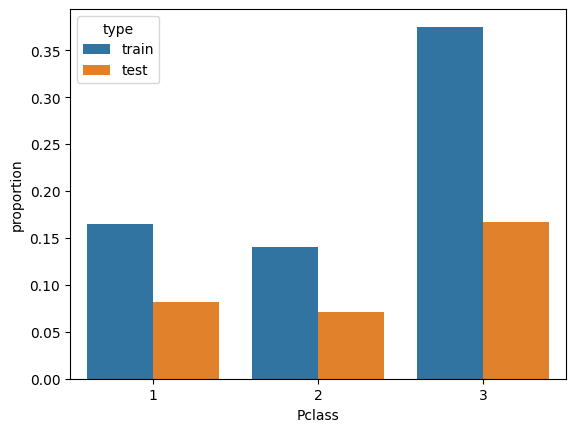

In [19]:
sns.countplot(data=all, x='Pclass', hue='type', stat = 'proportion')

In [20]:
int(all['Pclass'].isna().sum())

0

Distribution of training and test dataset is highly similar.
Most passengers are in "class" 3.

No missing data for `Pclass`.

**`Name`**

In [21]:
np.random.seed(129)
for name in np.random.choice(all['Name'], 30):
    print(name)

Everett, Mr. Thomas James
Larsson, Mr. Bengt Edvin
Torfa, Mr. Assad
Rowe, Mr. Alfred G
Beckwith, Mr. Richard Leonard
Theobald, Mr. Thomas Leonard
Dennis, Mr. Samuel
Hippach, Miss. Jean Gertrude
Skoog, Miss. Mabel
Widener, Mrs. George Dunton (Eleanor Elkins)
Sutton, Mr. Frederick
Nicola-Yarred, Master. Elias
Silven, Miss. Lyyli Karoliina
Meek, Mrs. Thomas (Annie Louise Rowley)
Lesurer, Mr. Gustave J
Mock, Mr. Philipp Edmund
Sheerlinck, Mr. Jan Baptist
Salomon, Mr. Abraham L
Keeping, Mr. Edwin
Abbing, Mr. Anthony
Razi, Mr. Raihed
Andreasson, Mr. Paul Edvin
Jussila, Miss. Katriina
Lindblom, Miss. Augusta Charlotta
Kirkland, Rev. Charles Leonard
Mangan, Miss. Mary
O'Brien, Mr. Thomas
Johnston, Miss. Catherine Helen "Carrie"
Stewart, Mr. Albert A
Bidois, Miss. Rosalie


In [22]:
int(all['Name'].isna().sum())

0

Names are highly intresting.
- the title like "Mr" and "Mrs" is given
- some names are in brackets
- some names are in " "
- there are family names several time in name list
- some have two first names or even more

No missing data for `Name`.

New feature can be engineered out of the name.
- the title will be extracted: `Title`
- information if name in brackets is given or not: `BrName`
- information if name in " " is given or not: `ShName`
- the number of first names: `FirstNames No`

In [23]:
def title_in_name(name):

  title =  re.findall(r'(\w+\.)', name)[0]
  return title

all['Title'] = all['Name'].apply(title_in_name)
int(all['Title'].isna().sum())

0

In [24]:
title_counts = all['Title'].value_counts(dropna=False)
title_counts

,count
Title,
Mr.,757
Miss.,260
Mrs.,197
Master.,61
Rev.,8
Dr.,8
Col.,4
Major.,2
Mlle.,2


In [25]:
title_mapper = {}

for title in title_counts.index:
  if title_counts[title] > 7:
    title_mapper[title] = title
  else:
    title_mapper[title] = 'Rare'


all['Title'] = all['Title'].map(title_mapper)

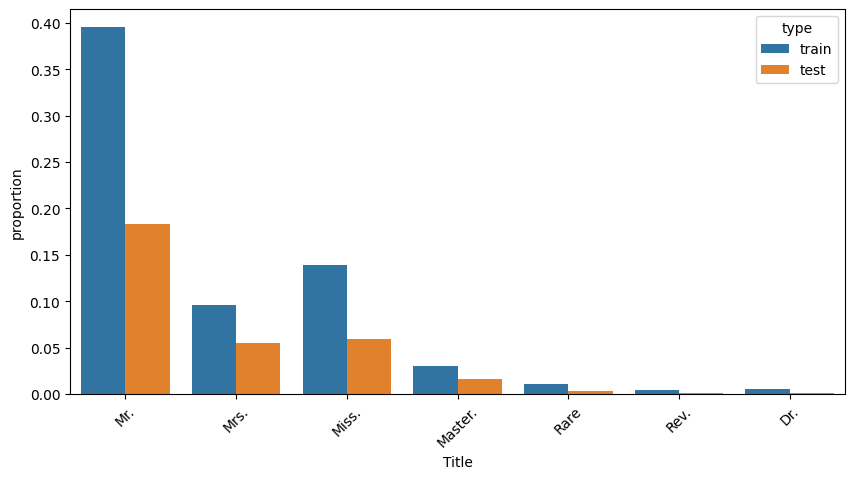

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=all, x='Title', hue='type', stat = 'proportion', ax = ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [27]:
def special_in_name(name, special):
  index = name.find(rf'{special}')
  if index != -1:
      return True
  else:
      return False

<Axes: xlabel='ShName', ylabel='proportion'>

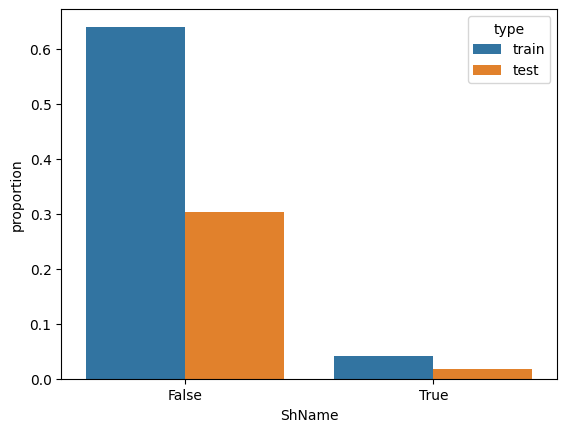

In [28]:
all['ShName'] = all['Name'].apply(special_in_name, args=('"'))

sns.countplot(data=all, x='ShName', hue='type', stat = 'proportion')

<Axes: xlabel='BrName', ylabel='proportion'>

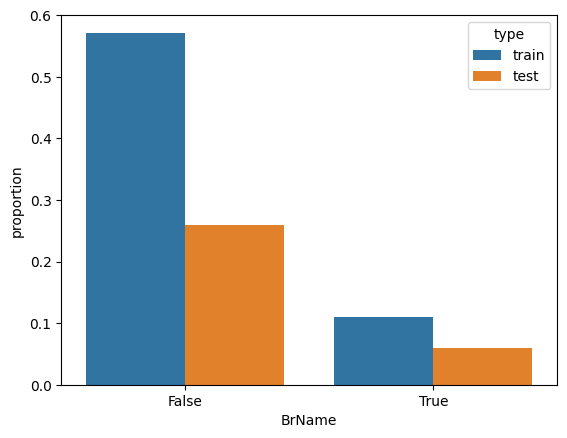

In [29]:
all['BrName'] = all['Name'].apply(special_in_name, args=('('))

sns.countplot(data=all, x='BrName', hue='type', stat = 'proportion')

In [30]:
def number_first_names(name):
  index_point = name.find(".")
  first_name = name[index_point + 2:]
  if first_name.find("(") != -1:
    first_name = first_name.rsplit("(")[0]
  if first_name.find('"') != -1:
    first_name = first_name.rsplit('"')[0]
  return len(first_name.split())

all['FirstNames No'] = all['Name'].apply(number_first_names)



In [31]:
all[['Name', 'FirstNames No']].sample(10)

,Name,FirstNames No
PassengerId,,
1037,"Vander Planke, Mr. Julius",1
654,"O'Leary, Miss. Hanora ""Norah""",1
90,"Celotti, Mr. Francesco",1
1119,"McNeill, Miss. Bridget",1
967,"Keeping, Mr. Edwin",1
102,"Petroff, Mr. Pastcho (""Pentcho"")",1
61,"Sirayanian, Mr. Orsen",1
720,"Johnson, Mr. Malkolm Joackim",2
905,"Howard, Mr. Benjamin",1


In [32]:
all[all['FirstNames No'] == 4]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type,Title,ShName,BrName,FirstNames No
PassengerId,,,,,,,,,,,,,,,,
44,1.0,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,train,Miss.,False,False,4
700,0.0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,train,Mr.,False,False,4
716,0.0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,train,Mr.,False,False,4
776,0.0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S,train,Mr.,False,False,4
1066,NaN,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S,test,Mr.,False,False,4


<Axes: xlabel='FirstNames No', ylabel='proportion'>

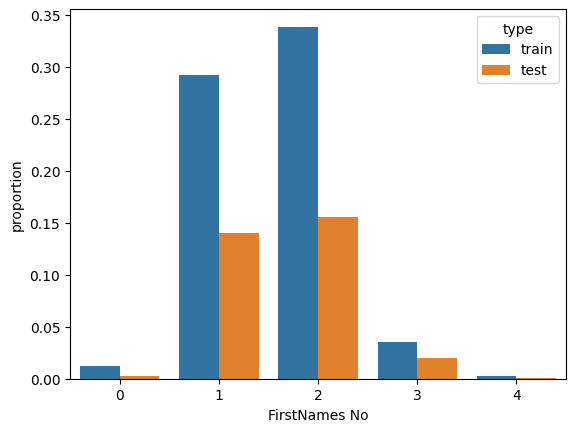

In [33]:
sns.countplot(data=all, x='FirstNames No', hue ='type',stat='proportion')

All new features describing the name are equally distributed for the training and test data set.

**`Sex`**

<Axes: xlabel='Sex', ylabel='proportion'>

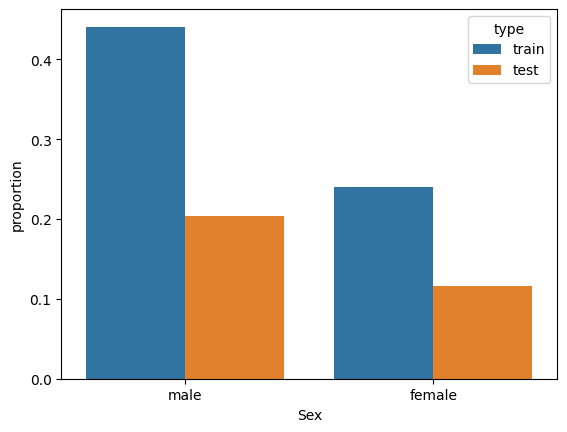

In [34]:
sns.countplot(data=all, x='Sex', hue='type', stat = 'proportion')

In [35]:
int(all['Sex'].isna().sum())

0

The distribution between "male" and "female" is the same for both datasets. There were more "males" on board of the "Titanic".
No missing data for `Sex`.

**`Age`**

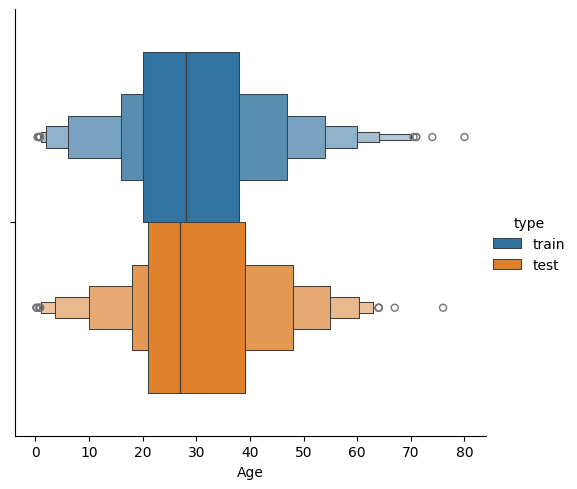

In [36]:
sns.catplot(data=all, x='Age', hue='type', kind = 'boxen')

In [37]:
int(all['Age'].isna().sum())

263

Distribution for `Age`is the same for both datasets. All ages were on board, oldest passengers were ~80.
There are missing data for `Age`.

**`SibSp`**

<Axes: xlabel='SibSp', ylabel='proportion'>

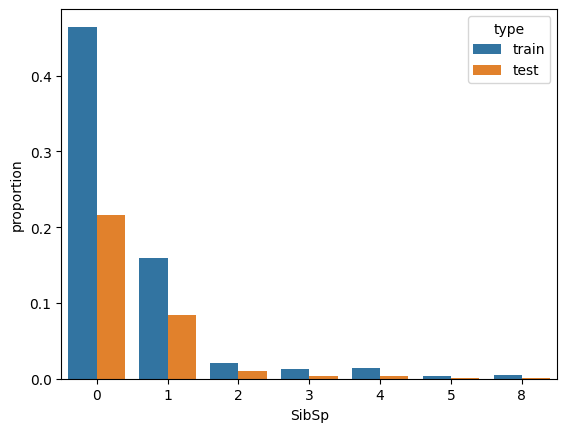

In [38]:
sns.countplot(data=all, x='SibSp', hue='type', stat='proportion')

In [39]:
int(all['SibSp'].isna().sum())

0

The distibution for `SibSp` is nearly the same for the training and test data set.
Most Passengers travelled alone. Quite some travelled with a lot of sisters and bothers, likely children. 8 `SibSp` is a higher number, but reasonable.

No missing data for `SibSp`.

**`Parch`**

<Axes: xlabel='Parch', ylabel='proportion'>

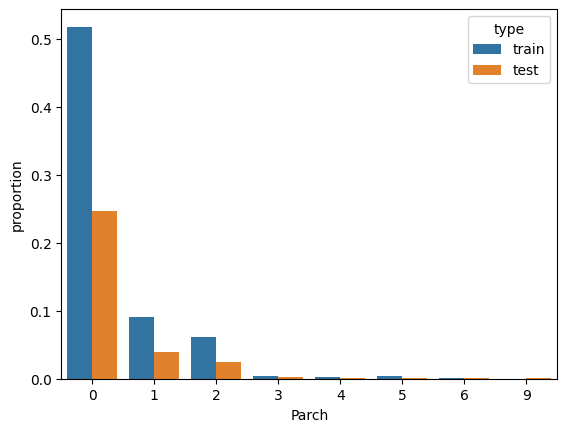

In [40]:
sns.countplot(data=all, x='Parch', hue='type', stat='proportion')

In [41]:
int(all['Parch'].isna().sum())

0

The distibution for `Parch` is highly similar for the training and test data set.
Same observation as for `SibSp`.

No missing data for `Parch`.

A new feature is engineered: The total number of relatives on board the "Titanic" `Relatives`.

<Axes: xlabel='Relatives', ylabel='proportion'>

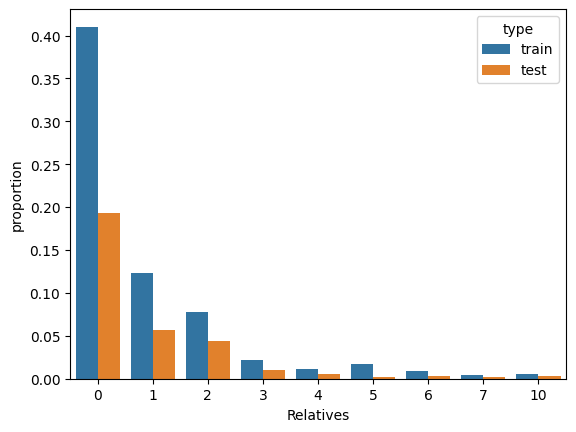

In [42]:
all['Relatives'] = all['SibSp'] + all['Parch']

sns.countplot(data=all, x='Relatives', hue='type', stat='proportion')

**`Ticket`**

In [43]:
np.random.seed(127)
for ticket in np.random.choice(all['Ticket'], 30):
    print(ticket)

CA. 2343
2669
SC/PARIS 2149
2661
7548
13236
C.A. 17248
330971
239865
13905
24160
2686
35273
349243
W.E.P. 5734
113059
11753
349218
2678
349215
S.O.C. 14879
C.A. 2315
W./C. 6608
7267
113051
4138
376563
STON/O 2. 3101289
11755
345771


In [44]:
ticket_counts = all['Ticket'].value_counts(dropna=False)
ticket_counts[ticket_counts > 2]

,count
Ticket,
CA. 2343,11
1601,8
CA 2144,8
347082,7
S.O.C. 14879,7
...,...
PP 9549,3
PC 17756,3
SOTON/O.Q. 3101315,3


`Ticket`numbers look quite different. They contain letters and differ in length. Likely `Ticket`numbers are very specific for a certain travel agency. This gives informations on the passengers, maybe also in which region they lived.
Some tickets seem to be group tickets. This is also intresting as these people could have helped each other to survive.

Several feature are extracted out of the `Ticket`number. It will be decided after further exploratory analyis if these feature are further modified and if they are used for data modelling.

These features are:
- the numbers only containining digits of the entire `Ticket`number: `Ticket No`
- the str only containing the str of the entire `Ticket`number: `Ticket Str`
- `Ticket New` clustering `Ticket` numbers to "Rare" if less than 4 passengers have the same ticket, for the others `Ticket` numbers are taken over
- the number of passengers per `Ticket`: `Ticket Passenger`

In [45]:
def extract_ticket_no(ticket):
  try:
    ticket_no = re.findall(r'(\d\d+)', ticket)[0]
    return int(ticket_no)
  except:
    return 0


all['Ticket No'] = all['Ticket'].apply(extract_ticket_no)

<Axes: xlabel='Ticket No', ylabel='Proportion'>

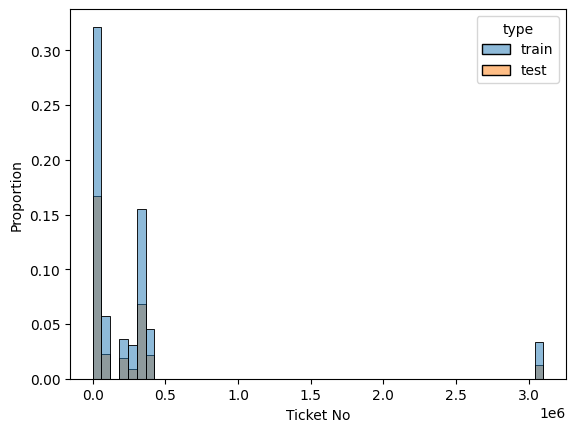

In [46]:
sns.histplot(data=all, x='Ticket No', hue ='type',stat='proportion')

(0.0, 500000.0)

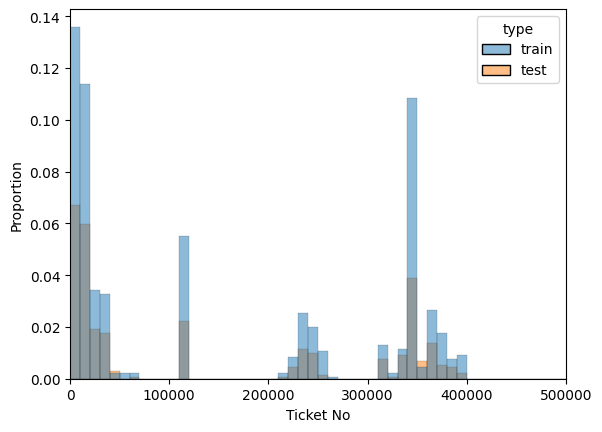

In [47]:
sns.histplot(data=all, x='Ticket No', hue ='type',stat='proportion', binwidth=10000)
plt.xlim(0, 500000)

(3000000.0, 3500000.0)

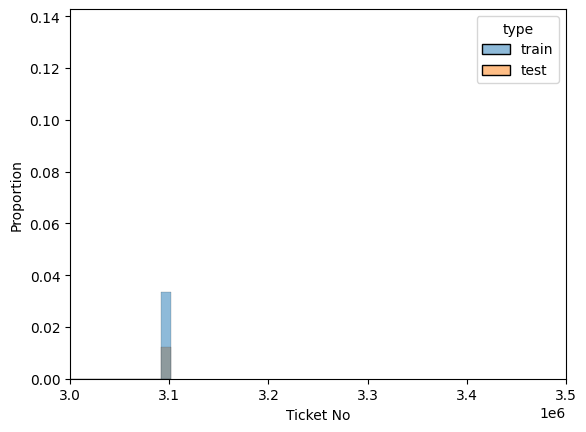

In [48]:
sns.histplot(data=all, x='Ticket No', hue ='type',stat='proportion', binwidth=10000)
plt.xlim(3000000, 3500000)

In [49]:
def extract_ticket_str(ticket):
  try:
    ticket_str = re.findall(r'[A-Za-z\.\/]+', ticket)[0]
    return ticket_str
  except:
    return 0


all['Ticket Str'] = all['Ticket'].apply(extract_ticket_str)

In [50]:
ticket_str_counts = all['Ticket Str'].value_counts()
ticket_str_counts[ticket_str_counts > 1]

,count
Ticket Str,
0,957
PC,92
C.A.,46
A/,31
STON/O,21
SOTON/O.Q.,16
W./C.,14
CA.,12
SC/PARIS,11


In [51]:
ticket_str_mapper = {}

for ticket_str in ticket_str_counts.index:
  if ticket_str_counts[ticket_str] > 7:
    ticket_str_mapper[ticket_str] = ticket_str
  else:
    ticket_str_mapper[ticket_str] = 'Rare'

all['Ticket Str'] = all['Ticket Str'].map(ticket_str_mapper)

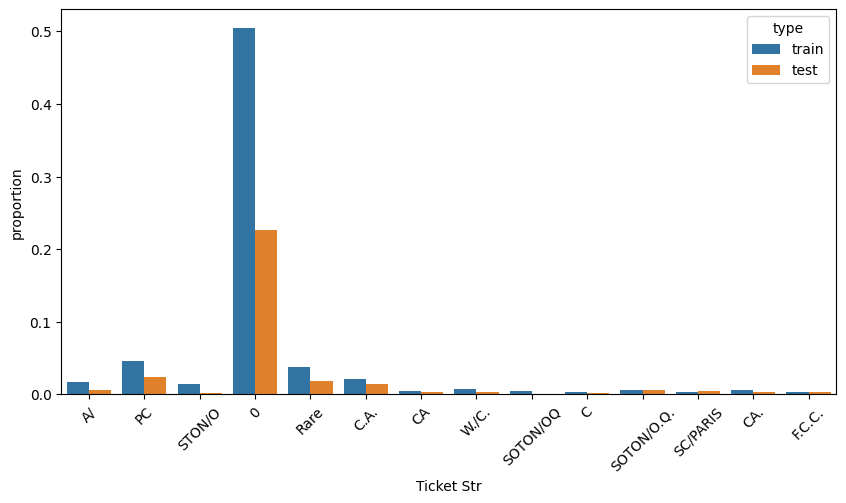

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=all, x='Ticket Str', hue='type', stat = 'proportion', ax = ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [53]:
ticket_passenger_mapper = {}

for ticket in ticket_counts.index:
  ticket_passenger_mapper[ticket] = ticket_counts[ticket]

all['Ticket Passenger'] = all['Ticket'].map(ticket_passenger_mapper)

<Axes: xlabel='Ticket Passenger', ylabel='proportion'>

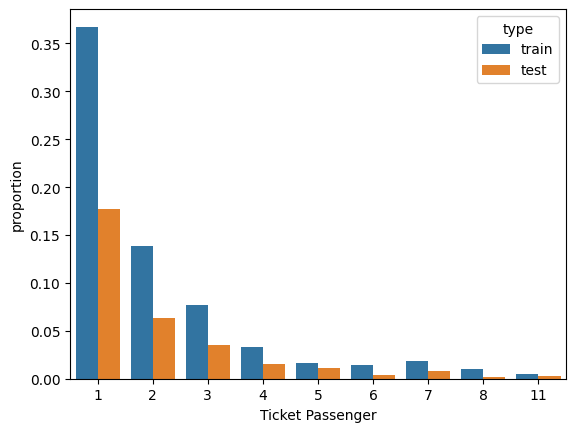

In [54]:
sns.countplot(data=all, x='Ticket Passenger', hue ='type',stat='proportion')

In [55]:
ticket_mapper = {}
for ticket in ticket_counts.index:
  if ticket_counts[ticket] > 3:
    ticket_mapper[ticket] = ticket
  else:
    ticket_mapper[ticket] = 'Rare'

all['Ticket New'] = all['Ticket'].map(ticket_mapper)

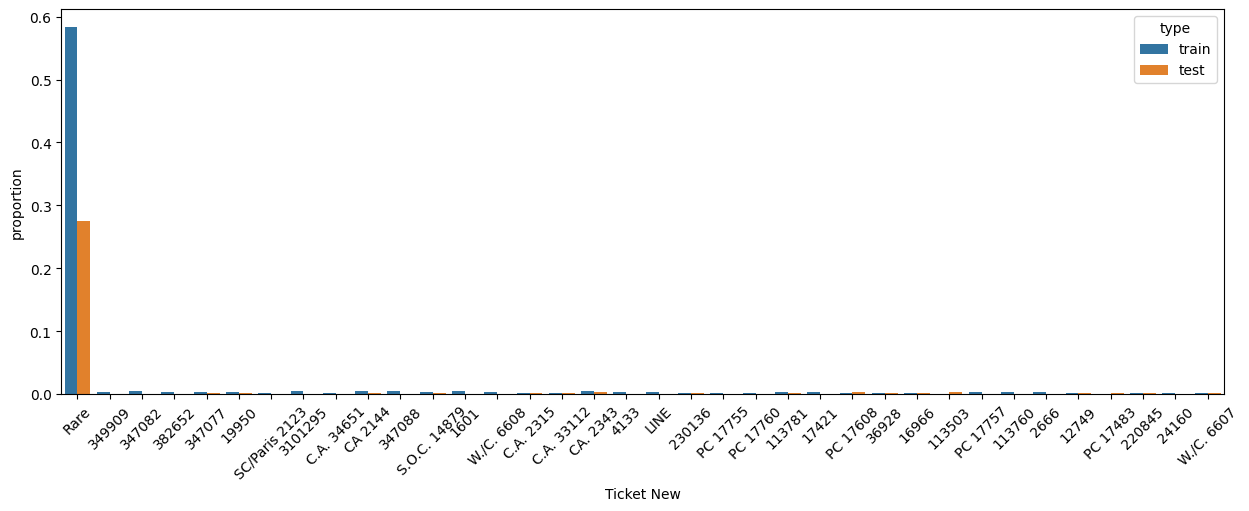

In [56]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=all, x='Ticket New', hue ='type',stat='proportion', ax = ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

Distribution for extracted features is similar for training and test dataset.

**`Fare`**

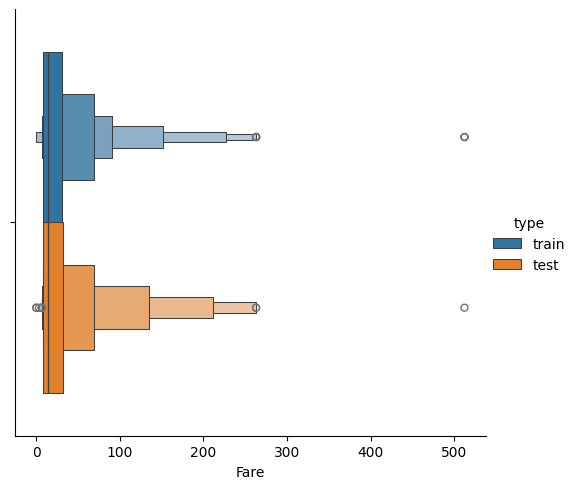

In [57]:
sns.catplot(data=all, x='Fare', hue='type', kind = 'boxen')

In [58]:
int(all['Fare'].isna().sum())

1

'Fare' has the same distribution for the training and test data.
There is some very high value in both datasets.

It is assumed that `Fare`might be the `Ticket`.

There is one missing value in `Fare`.

In [59]:
all[all['Fare'] == np.max(all['Fare'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,type,Title,ShName,BrName,FirstNames No,Relatives,Ticket No,Ticket Str,Ticket Passenger,Ticket New
PassengerId,,,,,,,,,,,,,,,,,,,,,
259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,...,train,Miss.,False,False,1,0,17755,PC,4,PC 17755
680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,...,train,Mr.,False,False,3,1,17755,PC,4,PC 17755
738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,...,train,Mr.,False,False,2,0,17755,PC,4,PC 17755
1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,...,test,Mrs.,False,True,3,1,17755,PC,4,PC 17755


In [60]:
all[all['SibSp'] == 8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,type,Title,ShName,BrName,FirstNames No,Relatives,Ticket No,Ticket Str,Ticket Passenger,Ticket New
PassengerId,,,,,,,,,,,,,,,,,,,,,
160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,...,train,Master.,False,False,2,10,2343,CA.,11,CA. 2343
181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,...,train,Miss.,False,False,2,10,2343,CA.,11,CA. 2343
202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,...,train,Mr.,False,False,1,10,2343,CA.,11,CA. 2343
325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,...,train,Mr.,False,False,3,10,2343,CA.,11,CA. 2343
793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,...,train,Miss.,False,False,2,10,2343,CA.,11,CA. 2343
847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,...,train,Mr.,False,False,2,10,2343,CA.,11,CA. 2343
864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,...,train,Miss.,True,False,2,10,2343,CA.,11,CA. 2343
1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,...,test,Miss.,False,False,1,10,2343,CA.,11,CA. 2343
1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,...,test,Master.,False,False,2,10,2343,CA.,11,CA. 2343


Looking at the two examples, it looks reasoanble, that the `Fare`is per `Ticket`.

A new feature `Fare Ticket`is created.

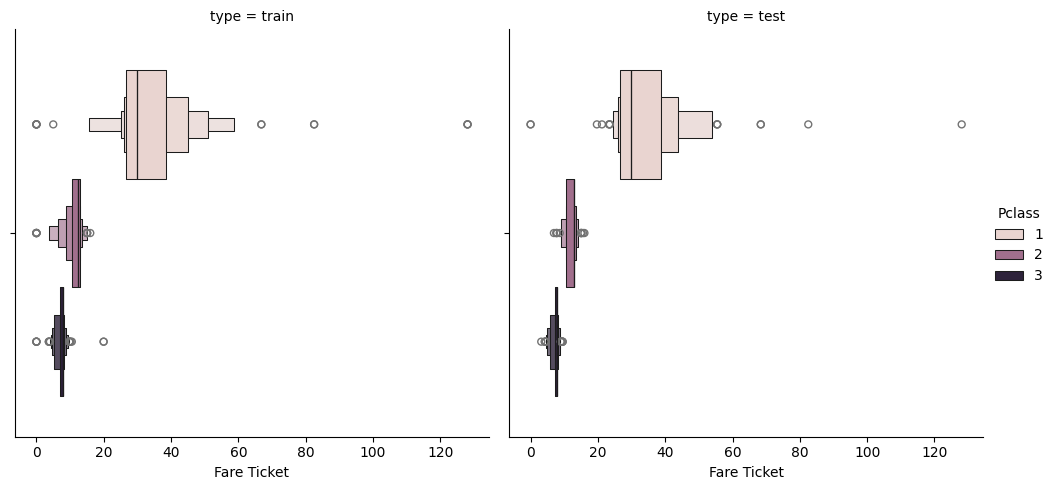

In [61]:
all['Fare Ticket'] = all['Fare'] / all['Ticket Passenger']

sns.catplot(data=all, x='Fare Ticket', col='type', hue ='Pclass',kind = 'boxen')

Intrestingly, `Fare Ticket` varies significantly for first-class passengers.

**`Cabin`**

In [62]:
np.random.seed(127)
for cabin in np.random.choice(all['Cabin'], 20):
    print(cabin)

nan
nan
nan
nan
nan
C78
nan
nan
nan
nan
B5
nan
D36
nan
E31
nan
D19
nan
nan
nan


In [63]:
cabin_counts = all['Cabin'].value_counts(dropna = False)
cabin_counts[cabin_counts > 3]

,count
Cabin,
NaN,1014
C23 C25 C27,6
G6,5
B57 B59 B63 B66,5
F33,4
F4,4
C78,4
D,4
F2,4


`Cabin`numbers are also intresting. In some cases more than one `Cabin`number is given. A lot of values are missing.

Passenger on the same cabine have likely survived or all not.

Imputing missing values is quite difficult. Therefore, these values ignored or filled with a unique value a "0".

The following features are created:
- the letter `Cabin`number startwith: `Cabin Letter`
- `Cabin New` clustering `Cabin` numbers to "Rare" if less than 5 passengers were in the same cabin, for the others `Cabin` numbers are taken over
- the number of passengers per `Cabin`: `Cabin Passenger`

<Axes: xlabel='Cabin Letter', ylabel='proportion'>

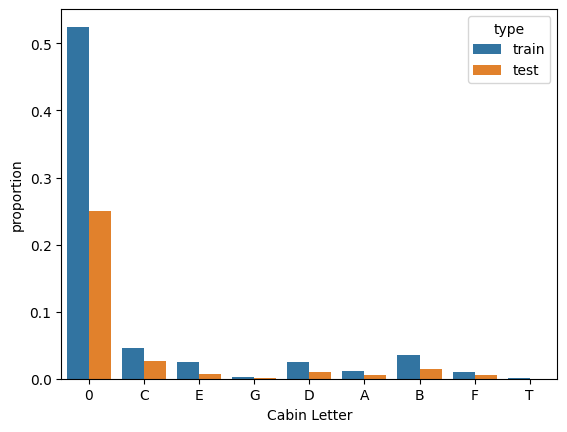

In [64]:
all['Cabin Letter'] = all['Cabin'].apply(lambda x: x[0] if type(x) == str else 0)

sns.countplot(data=all, x='Cabin Letter', hue='type', stat = 'proportion')

In [65]:
cabin_mapper = {}
for cabin in cabin_counts.index:
  if cabin_counts[cabin] > 3:
    cabin_mapper[cabin] = cabin

  else:
    cabin_mapper[cabin] = 'Rare'

all['Cabin New'] = all['Cabin'].map(cabin_mapper)
all['Cabin New'] = all['Cabin New'].apply(lambda x: x if type(x) == str else 0)

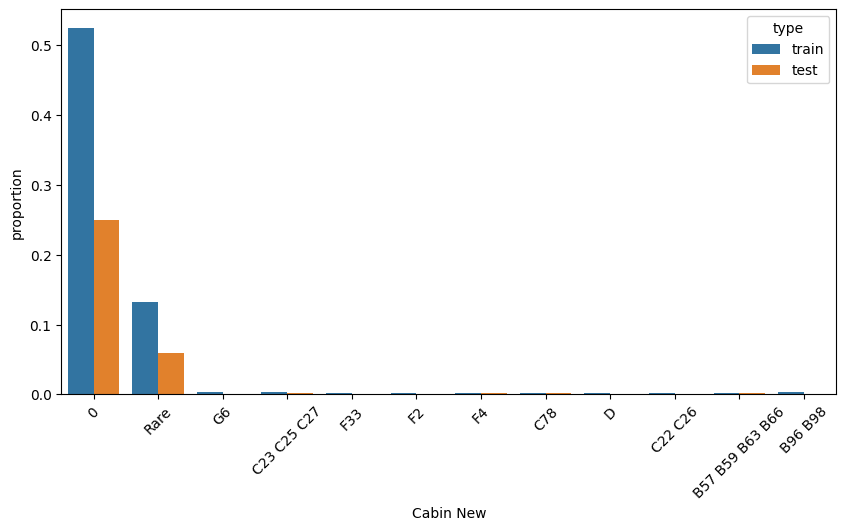

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=all, x='Cabin New', hue='type', stat = 'proportion', ax = ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [67]:
cabin_counts_wo_na = all['Cabin'].value_counts()

cabin_passenger_mapper = {}

for cabin in cabin_counts_wo_na.index:
  cabin_passenger_mapper[cabin] = cabin_counts_wo_na[cabin]

all['Cabin Passenger'] = all['Cabin'].map(cabin_passenger_mapper)
all['Cabin Passenger'] = all['Cabin Passenger'].fillna(0)

<Axes: xlabel='Cabin Passenger', ylabel='proportion'>

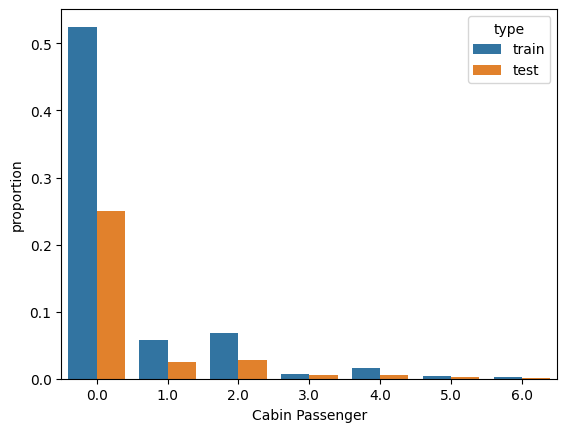

In [68]:
sns.countplot(data=all, x='Cabin Passenger', hue ='type',stat='proportion')

For newly engineered featured distribution of training and test dataset is the same.

**`Embarked`**

<Axes: xlabel='Embarked', ylabel='proportion'>

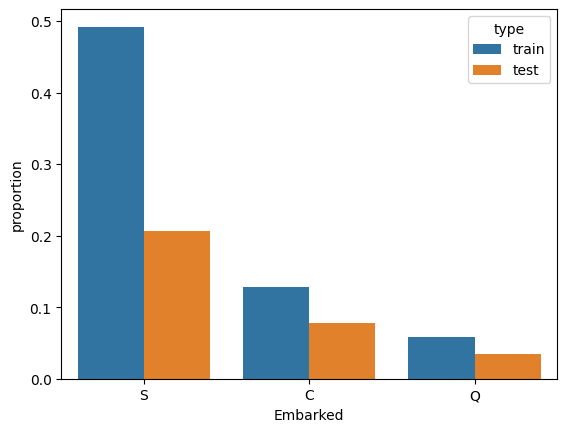

In [69]:
sns.countplot(data=all, x='Embarked', hue='type', stat = 'proportion')

In [70]:
int(all['Embarked'].isna().sum())

2

The distribution for the harbour passenger embarked from is the same for the training and test data set.

2 values are missing.

### <span style = "color: red" > Imputing of Missing Values

In [71]:
all.isna().sum()

,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


Missing values are in:
- `Survived`: logic - as dataset includes also test data
- `Age`: needs to be imputed from information of other features for a particular passenger
- `Fare Ticket`: needs to be imputed from information of other features for a particular passenger - `Fare`will be ignored
- `Cabin`: missing information about `Cabin`covered in feature `Cabin Letter`, 'Cabin New' and 'Cabin Passenger' as 0
- `Embarked`: needs to be imputed from information of other features for a particular passenger

**`Age`**

Missing values for variable age are imputed using information about `Sex` and number of relatives of the different generations.

In [72]:
sample_NoAge_index = all[all['Age'].isna()].sample(5, random_state = 126).index
all[all.index.isin(sample_NoAge_index)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FirstNames No,Relatives,Ticket No,Ticket Str,Ticket Passenger,Ticket New,Fare Ticket,Cabin Letter,Cabin New,Cabin Passenger
PassengerId,,,,,,,,,,,,,,,,,,,,,
160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,...,2,10,2343,CA.,11,CA. 2343,6.322727,0,0,0.0
728,1.0,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,...,1,0,36866,0,1,Rare,7.737500,0,0,0.0
793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,...,2,10,2343,CA.,11,CA. 2343,6.322727,0,0,0.0
838,0.0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,...,1,0,392092,0,1,Rare,8.050000,0,0,0.0
914,NaN,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,...,1,0,17598,PC,1,Rare,31.683300,0,0,0.0


In [73]:
all['SibSp_cond'] = all['SibSp'].apply(lambda x: 4 if x > 3 else x)
all['Parch_cond'] = all['Parch'].apply(lambda x: 4 if x > 3 else x)


all['Age'] = all['Age'].fillna(all.groupby(['Sex', 'SibSp_cond', 'Parch_cond'])['Age'].transform('median'))
int(all['Age'].isna().sum())

0

In [74]:
all[all.index.isin(sample_NoAge_index)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Ticket No,Ticket Str,Ticket Passenger,Ticket New,Fare Ticket,Cabin Letter,Cabin New,Cabin Passenger,SibSp_cond,Parch_cond
PassengerId,,,,,,,,,,,,,,,,,,,,,
160,0.0,3,"Sage, Master. Thomas Henry",male,9.0,8,2,CA. 2343,69.5500,NaN,...,2343,CA.,11,CA. 2343,6.322727,0,0,0.0,4,2
728,1.0,3,"Mannion, Miss. Margareth",female,28.0,0,0,36866,7.7375,NaN,...,36866,0,1,Rare,7.737500,0,0,0.0,0,0
793,0.0,3,"Sage, Miss. Stella Anna",female,10.0,8,2,CA. 2343,69.5500,NaN,...,2343,CA.,11,CA. 2343,6.322727,0,0,0.0,4,2
838,0.0,3,"Sirota, Mr. Maurice",male,29.0,0,0,392092,8.0500,NaN,...,392092,0,1,Rare,8.050000,0,0,0.0,0,0
914,NaN,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,28.0,0,0,PC 17598,31.6833,NaN,...,17598,PC,1,Rare,31.683300,0,0,0.0,0,0


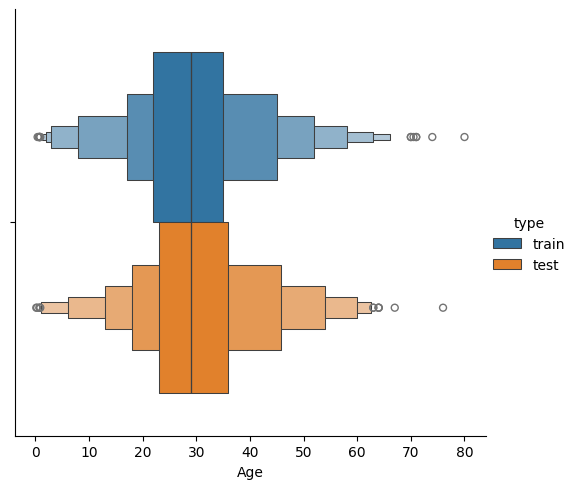

In [75]:
sns.catplot(data=all, x='Age', hue='type', kind = 'boxen')

**`Fare Ticket`**

Missing value for `Fare Ticket` is imputed using of `Sex`and `Pclass`.

In [76]:
NoFare_index = all[all['Fare Ticket'].isna()].index
all[all.index.isin(NoFare_index)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Ticket No,Ticket Str,Ticket Passenger,Ticket New,Fare Ticket,Cabin Letter,Cabin New,Cabin Passenger,SibSp_cond,Parch_cond
PassengerId,,,,,,,,,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,...,3701,0,1,Rare,NaN,0,0,0.0,0,0


In [77]:
all['Fare Ticket'] = all['Fare Ticket'].fillna(all.groupby(['Sex', 'Pclass'])['Fare Ticket'].transform('median'))
int(all['Fare'].isna().sum())

1

In [78]:
all[all.index.isin(NoFare_index)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Ticket No,Ticket Str,Ticket Passenger,Ticket New,Fare Ticket,Cabin Letter,Cabin New,Cabin Passenger,SibSp_cond,Parch_cond
PassengerId,,,,,,,,,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,...,3701,0,1,Rare,7.75,0,0,0.0,0,0


**`Embarked`**

In [79]:
NoEmbarked_index = all[all['Embarked'].isna()].index
all[all.index.isin(NoEmbarked_index)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Ticket No,Ticket Str,Ticket Passenger,Ticket New,Fare Ticket,Cabin Letter,Cabin New,Cabin Passenger,SibSp_cond,Parch_cond
PassengerId,,,,,,,,,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,...,113572,0,2,Rare,40.0,B,Rare,2.0,0,0
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,...,113572,0,2,Rare,40.0,B,Rare,2.0,0,0


In [80]:
all['Embarked'] = all['Embarked'].fillna(all.groupby(['Pclass','Sex'])['Embarked'].transform(lambda x: x.mode()[0]))
int(all['Embarked'].isna().sum())

0

In [81]:
all[all.index.isin(NoEmbarked_index)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Ticket No,Ticket Str,Ticket Passenger,Ticket New,Fare Ticket,Cabin Letter,Cabin New,Cabin Passenger,SibSp_cond,Parch_cond
PassengerId,,,,,,,,,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,...,113572,0,2,Rare,40.0,B,Rare,2.0,0,0
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,...,113572,0,2,Rare,40.0,B,Rare,2.0,0,0


<Axes: xlabel='Embarked', ylabel='proportion'>

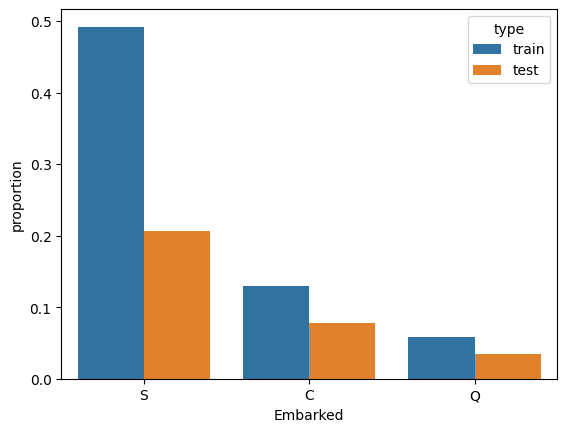

In [82]:
sns.countplot(data=all, x='Embarked', hue='type', stat = 'proportion')

### <span style = "color: red" > Data Description after Data Cleaning and Feature Engineering

In [83]:
all.dtypes

,0
Survived,float64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [ ]:
for col in ['ShName', 'BrName']:
  all.loc[:, col] = all.loc[:, col].astype('int')

#all.loc[:, 'Pclass'] = all.loc[:, 'Pclass'].astype('str')

In [85]:
all = all[['type', 'Survived', 'Pclass', 'Title', 'ShName', 'BrName', 'FirstNames No',
           'Sex', 'Age',
           'SibSp', 'Parch', 'Relatives',
           'Ticket New', 'Ticket No', 'Ticket Str','Ticket Passenger',
           'Fare Ticket','Cabin Letter', 'Cabin Passenger',
           'Embarked']]

test_new, train_new = all.groupby('type')

train_new = train_new[1].drop('type', axis = 1)
train_new['Survived'] = train_new['Survived'].astype('int')

test_new = test_new[1].drop(['type', 'Survived'], axis = 1)

**Data cleaning summary**

**Features** after data cleaning are:
- ticket class `Pclass`: categorical with ordered 3 categories: 1, 2, 3
- `Title`: categorical with 7 unordered categories like "Mr" and "Mrs"
- short name if name in " " `ShName`: categorical with 2 unordered categories: 0 = No, 1 = Yes
- if additional name in () `BrName`: categorical with 2 unordered categories: 0 = No, 1 = Yes
- number of first names `FirstNames No`: discrete numerical, ratio-scaled
- `Sex`: categorical with 2 unordered categories: "female" and "male"
- `Age`: continous, ratio-scaled, 1 digit
- \# of siblings / spouses aboard the Titanic `SibSp`: discrete numerical, ratio-scaled
- \# of parents / children aboard the Titanic `Parch`: discrete numerical, ratio-scaled
- \# of relatives abord the Titanic `Relatives`: discrete numerical, ratio-scaled
- ticket number `Ticket New`- only given when at least 4 persons have same ticket, otherwise "Rare" - categorical
- number on ticket `Ticket No`: discrete numerical
- string on ticket `Ticket Str`: categorical with 14 categories
- Passenger per ticket `Ticket Passenger`: discrete numerical
- fare per ticket `Fare Ticket`: continous, ratio-scaled, 4 digits
- `Cabin Letter`: categorical with 9 categories like "A", "B" and "C"
- passenger per cabin `Cabin Passenger`: discrete numerical
- Port of Embarkation `Embarked`: categorical with 3 unordered categories C = Cherbourg, Q = Queenstown, S = Southampton

In total 12 features were imputed
- 4 out of the original feature `Name` which itself is not used any longer as feature
- 1 out of # of siblings / spouses `SibSp` and parents / children `Parch` aboard the Titanic
- 4 out of `Ticket`number which itself is not used any longer as feature
- Passenger `Fare` is replaced by fare per ticket `Fare Ticket`
- 2 out `Cabin` number which itself is not used any longer as feature

**Target** is:
- `Survived`: categorical with 2 unordered categories: 0 = No, 1 = Yes

No obervations were removed from the dataset.

All missing values which were present for features `Age`, `Fare Ticket` and `Embarked`  were imputed for respective observation using group median or group mode. Missing values for `Cabin` were covered in features `Cabin Letter`, 'Cabin New' and 'Cabin Passenger' as new category "0".

**Observation**

Training and test data are highly comparable in their distribution.

**Training data**

In [86]:
train_new.head()

,Survived,Pclass,Title,ShName,BrName,FirstNames No,Sex,Age,SibSp,Parch,Relatives,Ticket New,Ticket No,Ticket Str,Ticket Passenger,Fare Ticket,Cabin Letter,Cabin Passenger,Embarked
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,Mr.,0,0,2,male,22.0,1,0,1,Rare,21171,A/,1,7.25000,0,0.0,S
2,1,1,Mrs.,0,1,2,female,38.0,1,0,1,Rare,17599,PC,2,35.64165,C,2.0,C
3,1,3,Miss.,0,0,1,female,26.0,0,0,0,Rare,3101282,STON/O,1,7.92500,0,0.0,S
4,1,1,Mrs.,0,1,2,female,35.0,1,0,1,Rare,113803,0,2,26.55000,C,2.0,S
5,0,3,Mr.,0,0,2,male,35.0,0,0,0,Rare,373450,0,1,8.05000,0,0.0,S


In [87]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Title             891 non-null    object 
 3   ShName            891 non-null    int64  
 4   BrName            891 non-null    int64  
 5   FirstNames No     891 non-null    int64  
 6   Sex               891 non-null    object 
 7   Age               891 non-null    float64
 8   SibSp             891 non-null    int64  
 9   Parch             891 non-null    int64  
 10  Relatives         891 non-null    int64  
 11  Ticket New        891 non-null    object 
 12  Ticket No         891 non-null    int64  
 13  Ticket Str        891 non-null    object 
 14  Ticket Passenger  891 non-null    int64  
 15  Fare Ticket       891 non-null    float64
 16  Cabin Letter      891 non-null    object 
 17  Ca

In [88]:
train_new.describe()

,Survived,Pclass,ShName,BrName,FirstNames No,Age,SibSp,Parch,Relatives,Ticket No,Ticket Passenger,Fare Ticket,Cabin Passenger
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.059484,0.160494,1.595960,29.275724,0.523008,0.381594,0.904602,2.969891e+05,2.121212,14.551089,0.468013
std,0.486592,0.836071,0.236661,0.367270,0.638243,13.257376,1.102743,0.806057,1.613459,6.564383e+05,1.796660,13.575057,1.027618
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,1.431250e+04,1.000000,7.495800,0.000000
50%,0.000000,3.000000,0.000000,0.000000,2.000000,29.000000,0.000000,0.000000,0.000000,1.120580e+05,1.000000,8.050000,0.000000
75%,1.000000,3.000000,0.000000,0.000000,2.000000,35.000000,1.000000,0.000000,1.000000,3.470820e+05,3.000000,13.825000,0.000000
max,1.000000,3.000000,1.000000,1.000000,4.000000,80.000000,8.000000,6.000000,10.000000,3.101317e+06,11.000000,128.082300,6.000000


**Test data**

In [89]:
test_new.head()

,Pclass,Title,ShName,BrName,FirstNames No,Sex,Age,SibSp,Parch,Relatives,Ticket New,Ticket No,Ticket Str,Ticket Passenger,Fare Ticket,Cabin Letter,Cabin Passenger,Embarked
PassengerId,,,,,,,,,,,,,,,,,,
892,3,Mr.,0,0,1,male,34.5,0,0,0,Rare,330911,0,1,7.82920,0,0.0,Q
893,3,Mrs.,0,1,1,female,47.0,1,0,1,Rare,363272,0,1,7.00000,0,0.0,S
894,2,Mr.,0,0,2,male,62.0,0,0,0,Rare,240276,0,1,9.68750,0,0.0,Q
895,3,Mr.,0,0,1,male,27.0,0,0,0,Rare,315154,0,1,8.66250,0,0.0,S
896,3,Mrs.,0,1,1,female,22.0,1,1,2,Rare,3101298,0,2,6.14375,0,0.0,S


In [90]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Title             418 non-null    object 
 2   ShName            418 non-null    int64  
 3   BrName            418 non-null    int64  
 4   FirstNames No     418 non-null    int64  
 5   Sex               418 non-null    object 
 6   Age               418 non-null    float64
 7   SibSp             418 non-null    int64  
 8   Parch             418 non-null    int64  
 9   Relatives         418 non-null    int64  
 10  Ticket New        418 non-null    object 
 11  Ticket No         418 non-null    int64  
 12  Ticket Str        418 non-null    object 
 13  Ticket Passenger  418 non-null    int64  
 14  Fare Ticket       418 non-null    float64
 15  Cabin Letter      418 non-null    object 
 16  Cabin Passenger   418 non-null    float64
 17 

In [91]:
test_new.describe()

,Pclass,ShName,BrName,FirstNames No,Age,SibSp,Parch,Relatives,Ticket No,Ticket Passenger,Fare Ticket,Cabin Passenger
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,4.180000e+02,418.000000,418.000000,418.000000
mean,2.265550,0.052632,0.186603,1.607656,30.025120,0.447368,0.392344,0.839713,2.534044e+05,2.059809,15.181115,0.464115
std,0.841838,0.223564,0.390059,0.630282,12.786592,0.896760,0.981429,1.519072,5.876873e+05,1.744814,13.508432,1.052531
min,1.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,23.000000,0.000000,0.000000,0.000000,1.350800e+04,1.000000,7.721850,0.000000
50%,3.000000,0.000000,0.000000,2.000000,29.000000,0.000000,0.000000,0.000000,3.560950e+04,1.000000,8.662500,0.000000
75%,3.000000,0.000000,0.000000,2.000000,36.000000,1.000000,0.000000,1.000000,3.455002e+05,2.000000,18.775000,0.000000
max,3.000000,1.000000,1.000000,4.000000,76.000000,8.000000,9.000000,10.000000,3.101315e+06,11.000000,128.082300,6.000000


### <span style = "color: red" > Correlation

**Correlation matrix**

For numerical variables, correlation matrix is plotted to investigate if a direct linear correlation is present.

In [92]:
num_variables = ['Age', 'SibSp', 'Parch', 'Relatives' ,'Ticket No', 'Ticket Passenger','Fare Ticket','Cabin Passenger']

<Axes: >

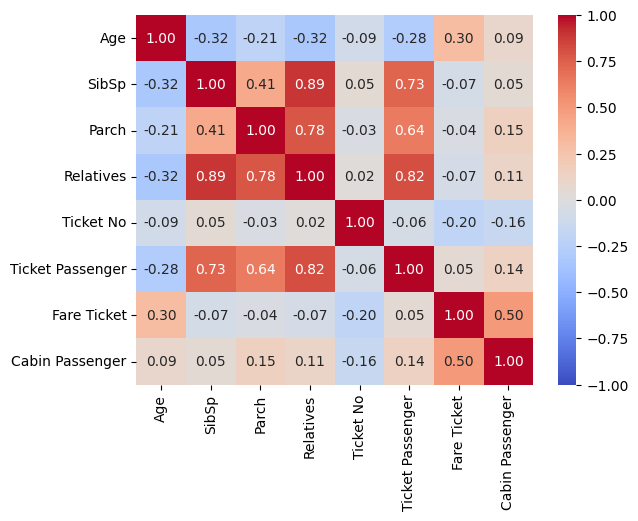

In [93]:
correlation_matrix = train_new[num_variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin = -1, vmax = 1)

A high positive correlation is observed or features:
- `SibSp` and `Relatives`
- `Parch`and `Relatives`
  
  -> expected as `Relatives`calculated as sum of `SibSp` and `Parch`

- `SibSp`and `Ticket Passenger`
- `Relatives`and `Ticket Passenger`

  -> expected as passenger per ticket is the higher the more relatives in a family

A moderate positive correlation is seen for features:
- `Parch` and `Ticket Passenger`

- `Cabin Passenger`and `Fare Ticket`

  -> likely cabin with a lot of passenger were suites

For all other features correlation is only slight or no correlation exists.


**Histograms and countplots for both classes of target variable `Survived`**

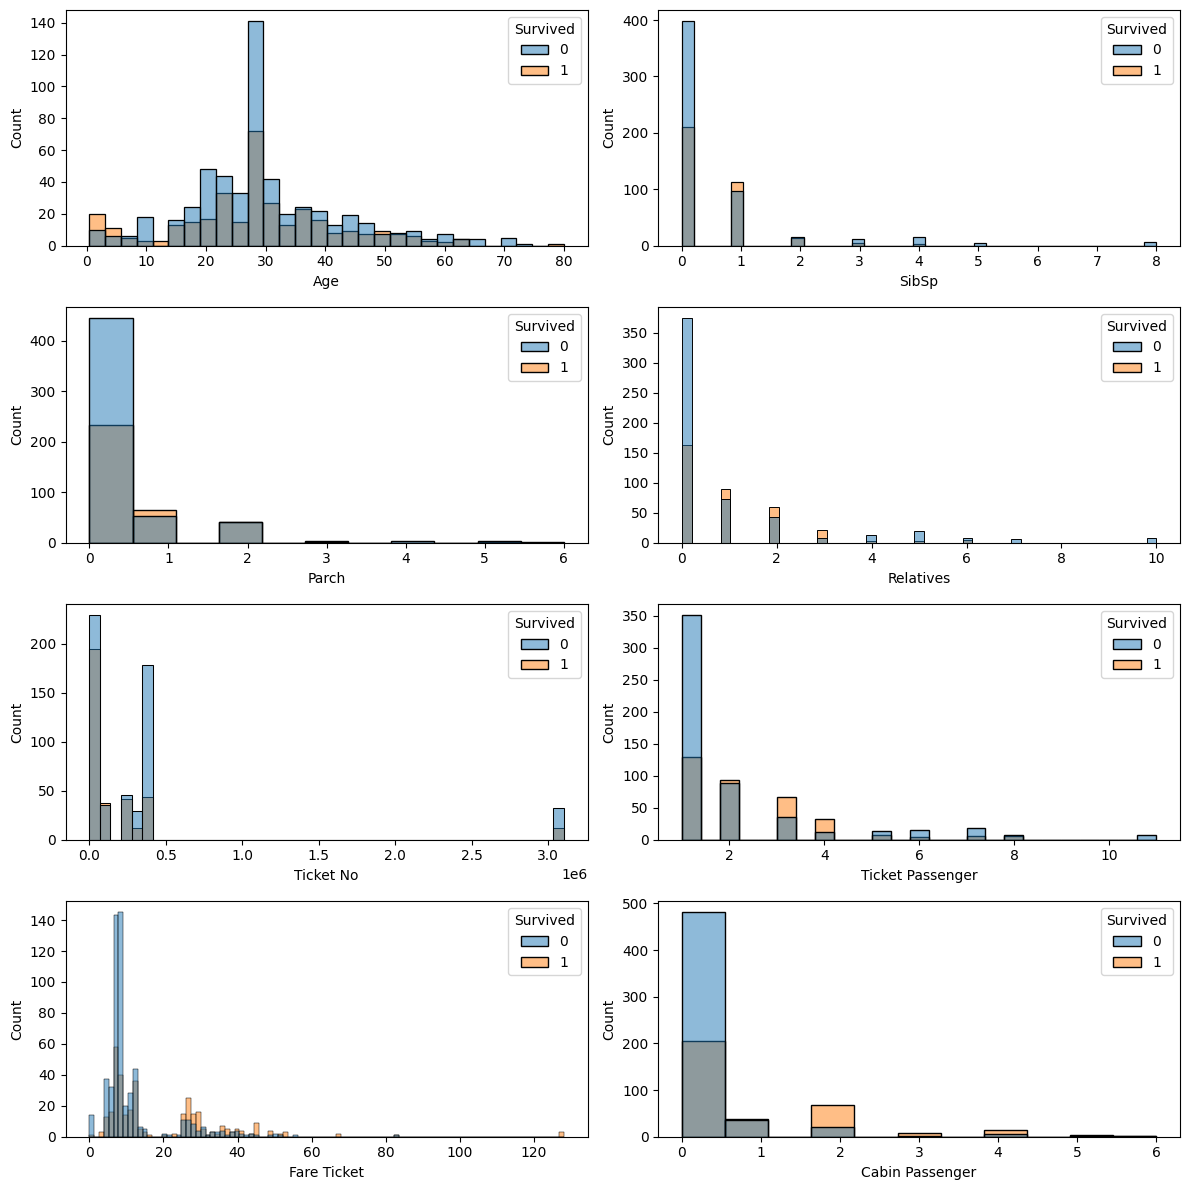

In [94]:
row = 4
col = 2
fig, ax = plt.subplots(row, col, figsize=(6*col, 3*row))
for index, variable in enumerate(num_variables):
    sns.histplot(data=train_new, x=variable, hue='Survived', ax = ax[index//col, index%col])
    plt.tight_layout()




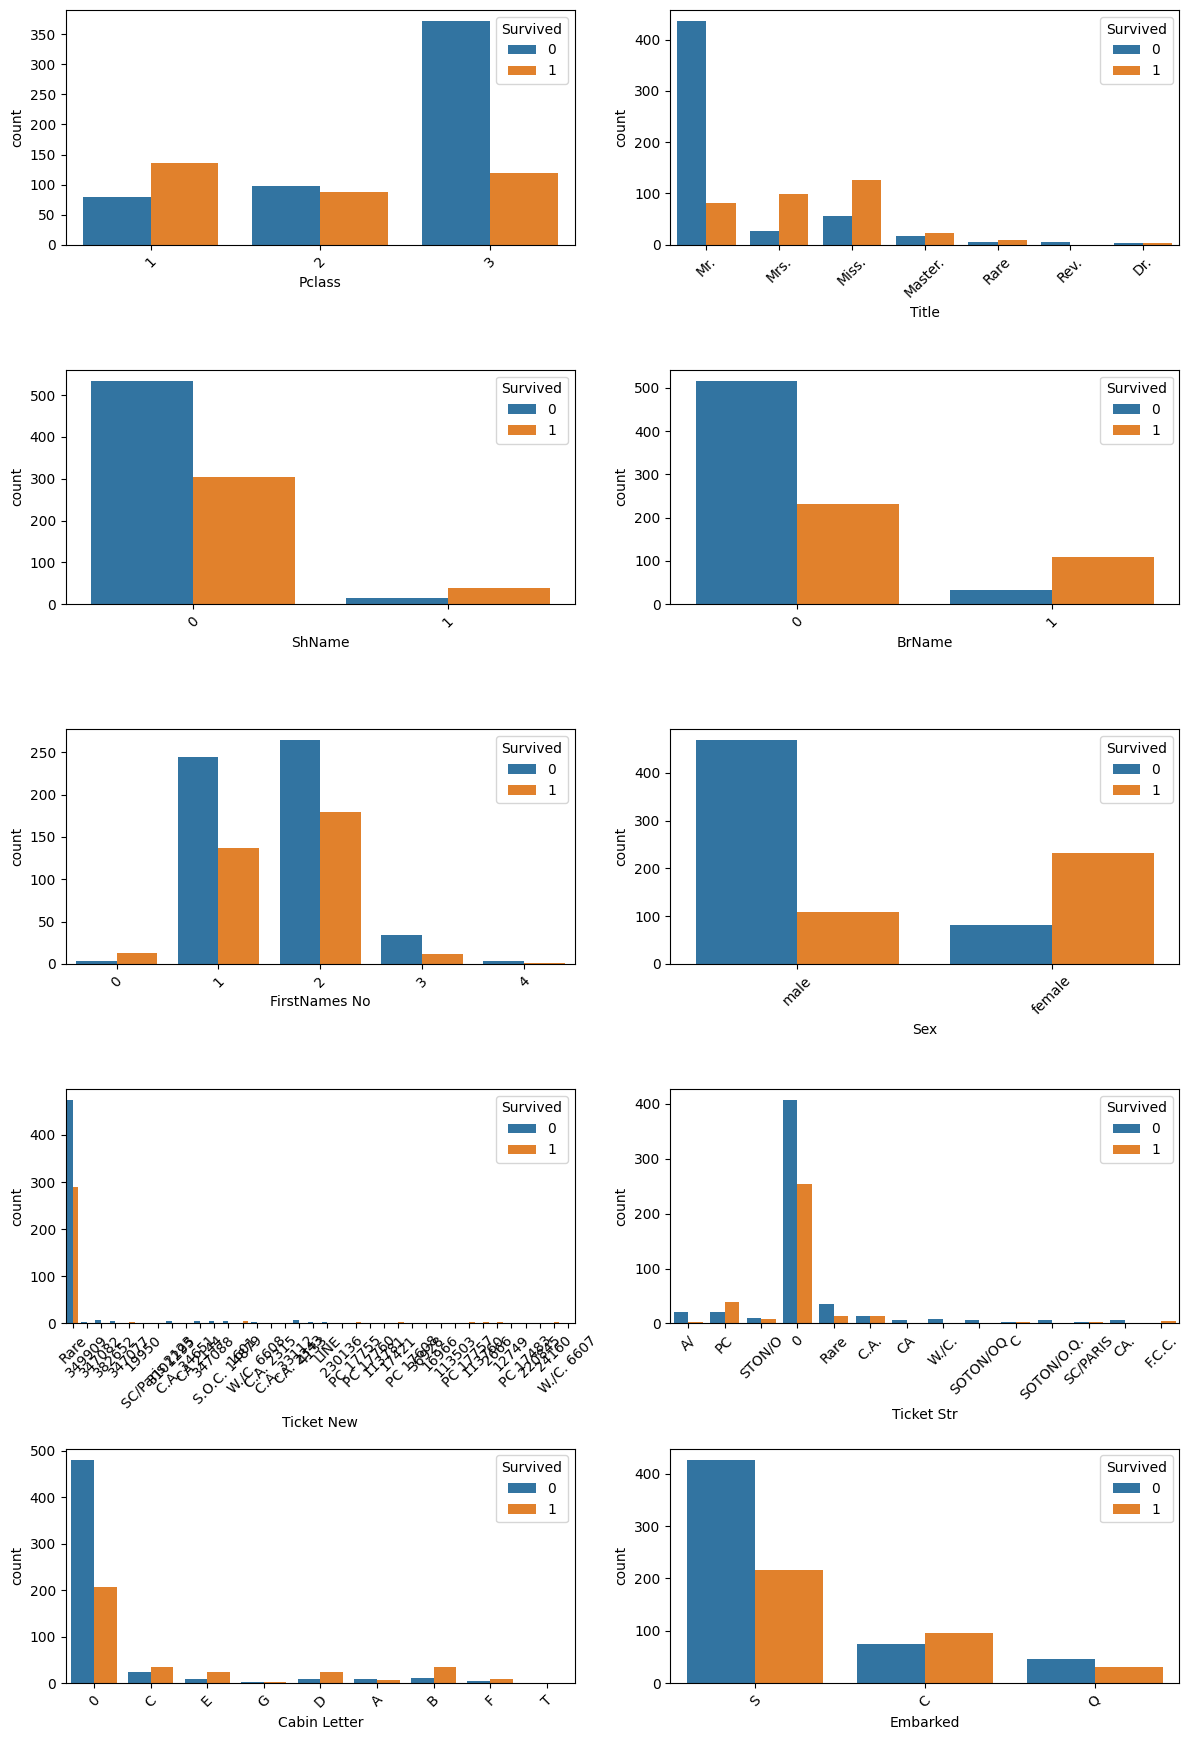

In [95]:
cat_variables = ['Pclass', 'Title', 'ShName', 'BrName', 'FirstNames No', 'Sex' ,'Ticket New' ,'Ticket Str' ,'Cabin Letter', 'Embarked']

row = 5
col = 2
fig, ax = plt.subplots(row, col, figsize=(6*col, 3.5*row))

for index, variable in enumerate(cat_variables):
    sns.countplot(data=train_new, x=variable, hue='Survived', ax = ax[index//col, index%col])
    for tick in ax[index//col, index%col].get_xticklabels():
      tick.set_rotation(45)
    plt.tight_layout()

There are several variables describing the feature `Ticket`. `Ticket no`should be actually better a categorical variables with classes of ticket numbers. However, by using a descision tree classes are automatically defined. In addition, also the variables `Ticket New`and `Ticket Str`describe `Ticket`.

**EDA summary**

Intrestingly, differences in the distribution of both classes of `Survived`are seen for all features in EDA. Thus, it makes sense to use all these variables for model building. A ranking of the features is very difficult, also features like `Relatives`and `Ticket Passenger` as well as `Title` and `Sex` are highly correlated.  Therefore, such classification models are used which have a feature selection / priorization mechanism in their algorithm. An overfitting can be avoided by hyperparameter tuning during crossvalidation.



## <span style = "color: red" > Model Building and Hyperparameter Optimization

**Modelling techniques**

It is well-known that more passenger of the first classes than of the others classes survived the sinking of the "Titanic". Also, children and women were the first loaded on the lifeboats. Actually, one can say that there were rules on who's life was saved. This can be best mimiced with a "Decision Tree" and the respective ensemble techniques like "Random Forest". Another option would be the use of a "Boosting" algorithmn using a "Decision Tree" stump.

However, for comparison also other modelling approaches like "Support Vector Machines" and "Logistic Regression" are tested. "Logistic Regression" is used with a penalty term similar to "Ridge Regression" to penalize irrelevant variables and avoid overfitting.

**General modelling approach**

*5-fold* crossvalidation is used for all modelling techniques to tune the model hyperparameter and avoid underfitting (too high biases) and overfitting (too high variance).
Hyperparameter are varied using "grid search".


### <span style = "color: red" > Data Preparation for Modelling
"Decision Trees" can usually handle all kinds of variables, numerical and categorical. Normally, categorical variables like `Title` with "Mister.", "Mrs" and "Miss" need *not* to be converted into vectors using a "one-hot" encoding. However, the Python built-in classes like `sklearn.tree.DecisionTreeClassifier`can only understand "numbers". Therefore, categorical variables are "one-hot" encoded.
This conversion step is anyway required for data preparation for modelling with "Support Vector Machines" and "Logistic Regression".

The latter both techniques also require a "z-normalization" of the data so that all features are standardized according their distribution. If this would not have been done, features would be used with very different weights in the model.

In [96]:
#one hot-encoding
all_onehot = pd.get_dummies(all, drop_first=True)

test_onehot, train_onehot = all_onehot.groupby('type_train')
train_onehot = train_onehot[1].drop('type_train', axis = 1)
test_onehot = test_onehot[1].drop('type_train', axis = 1)

train_onehot.shape, test_onehot.shape

((891, 78), (418, 78))

In [97]:
X_train = train_onehot.iloc[:,1:].values
y_train = train_onehot.iloc[:,0].values

X_test = test_onehot.iloc[:,1:].values

X_train.shape, y_train.shape, X_test.shape

((891, 77), (891,), (418, 77))

In [98]:
#z-normalization
from sklearn import preprocessing
X_all = np.concatenate((X_train, X_test), axis = 0)
scaler = preprocessing.StandardScaler().fit(X_all)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train[0,:], X_train_scaled[0,:], X_test[0,:], X_test_scaled[0,:]

(array([3, 0, 0, 2, 22.0, 1, 0, 1, 21171, 1, 7.25, 0.0, False, False, True,
        False, False, False, True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, True, False,
        False, False, False, True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, True],
       dtype=object),
 array([ 0.84191642, -0.24653186, -0.45069391,  0.6301528 , -0.57350644,
         0.48128777, -0.4449995 ,  0.07335229, -0.41234301, -0.61917365,
        -0.55380978, -0.4510531 , -0.22108416, -0.49785048,  0.85392868,
        -0.42090174, -0.11807913, -0.0784163 ,  0.74349692, -0.05536365,
        -0.06785837, -0.05536365, -0.0784163 , -0.06192218, -0.05536365,
        -0.06785837, -0.06192218, -0.05536365, -0.

### <span style = "color: red" > Simple Decision Tree

It is started with a simple, fully-grown "Decision Tree".

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(random_state = 129)
dt.fit(X_train, y_train)
train_accuracy = dt.score(X_train, y_train)
val_accuracy = np.mean(cross_val_score(dt, X_train, y_train, cv=5, scoring = 'accuracy'))

print(f'maximum depth: {dt.get_depth()}')
print(f'training accuracy: {train_accuracy :.2f}')
print(f'validation accuracy: {val_accuracy :.2f}')

maximum depth: 27
training accuracy: 1.00
validation accuracy: 0.78


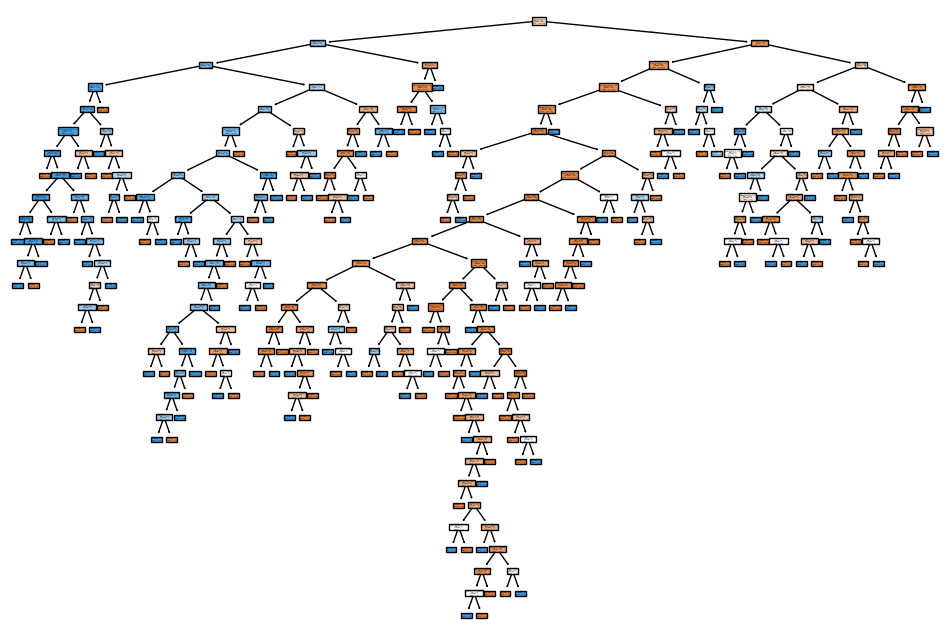

In [100]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, feature_names = train_onehot.columns[1:])
plt.savefig(os.path.join(working_dir, 'tree_full.png'), dpi = 600)
plt.show()

This tree has a maximum depth of 27 and is overfitted as seen in high training accuracy compared to the validation accuracy.

Cost complexity pruning is applied.

This means the number of terminal nodes is reduced considering an effective $\alpha$ of a node to be the value where:
$\alpha_{eff} = \frac{impurity\ mother\ node - impurity\ child\ nodes}{\#\ terminal\ nodes}$
A non-terminal node with the smallest value of $\alpha_{eff}$ is the weakest link and will be pruned. This process stops when the pruned tree’s minimal $\alpha_{eff}$ is greater than the ccp_alpha parameter.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

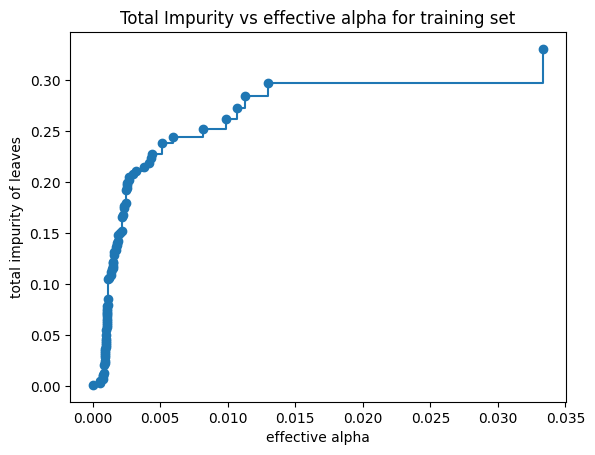

In [101]:
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [102]:
dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=129, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dts.append(dt)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {:.4f}".format(
        dts[-1].tree_.node_count, ccp_alphas[-1])
)
print(
    "Number of nodes in the first tree is: {} with ccp_alpha: {:.4f}".format(
        dts[0].tree_.node_count, ccp_alphas[0])
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.1427
Number of nodes in the first tree is: 349 with ccp_alpha: 0.0000


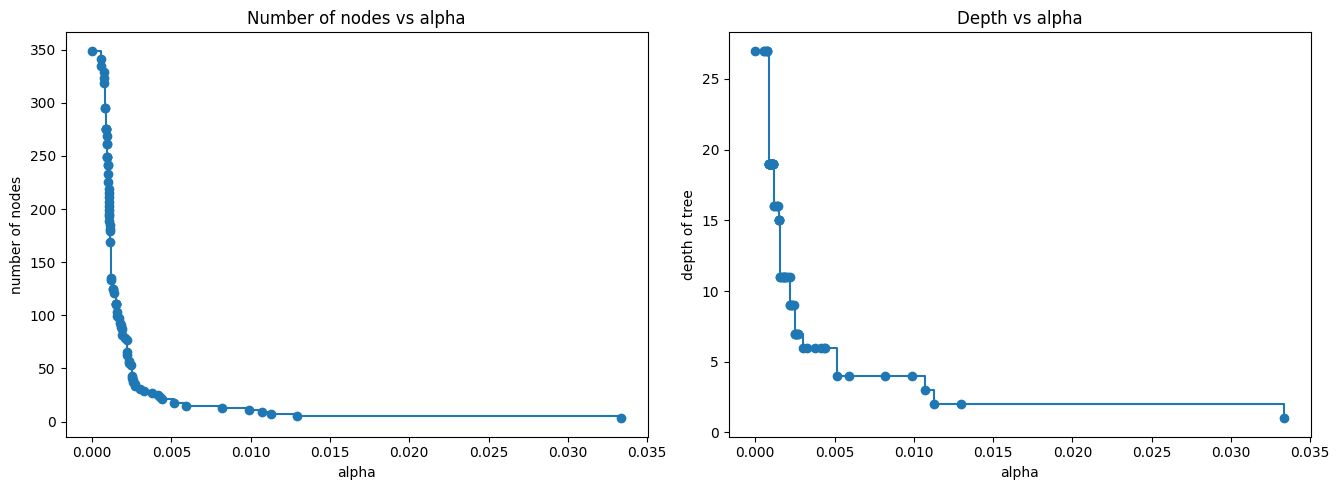

In [103]:
dts = dts[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt.tree_.node_count for dt in dts]
depth = [dt.tree_.max_depth for dt in dts]
fig, ax = plt.subplots(1, 2, figsize=(13.5, 5))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


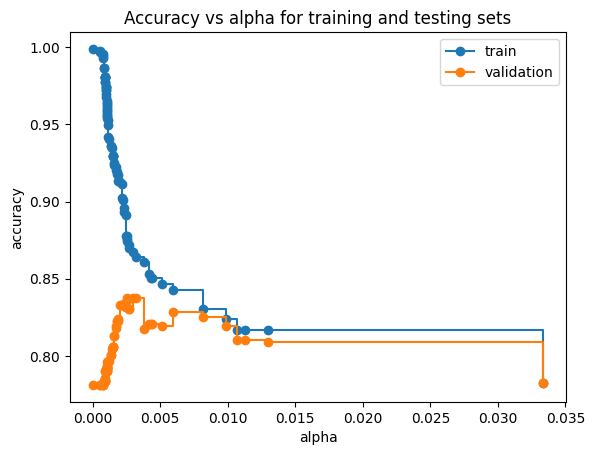

maximum depth = 7
maximum validation accuracy = 0.84 at alpha = 0.0026
respective training accuracy = 0.87


In [104]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
validation_scores = [np.mean(cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')) for dt in dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, validation_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

alpha_max = ccp_alphas[np.argmax(validation_scores)]
train_score_max = train_scores[np.argmax(validation_scores)]
validation_score_max = np.max(validation_scores)

print(f'maximum depth = {depth[np.argmax(validation_scores)]}')
print(f'maximum validation accuracy = {validation_score_max :.2f} at alpha = {alpha_max :.4f}')
print(f'respective training accuracy = {train_score_max :.2f}')

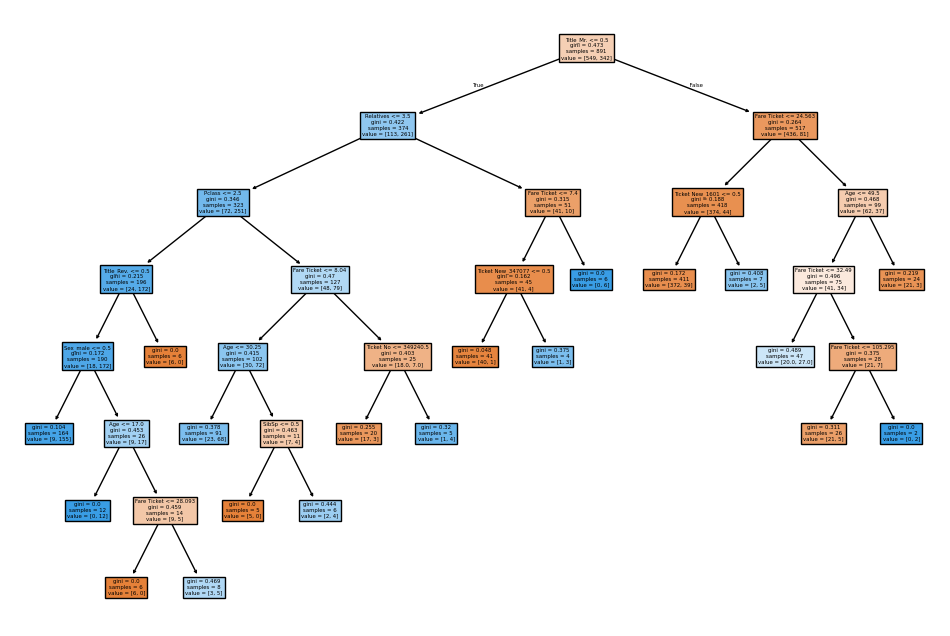

In [105]:
dt_optimized = DecisionTreeClassifier(random_state = 129, ccp_alpha = alpha_max)
dt_optimized.fit(X_train, y_train)

plt.figure(figsize=(12,8))
tree.plot_tree(dt_optimized, filled=True, feature_names=train_onehot.columns[1:])
plt.savefig(os.path.join(working_dir, 'tree_optimized.png'), dpi = 600)
plt.show()

Tree depth is significantly reduced. For the optimized model training and validation accuracy are very close.

Validation accuracy could be significantly improved from 0.78 for the full-grown tree to 0.84 for the pruned tree.

Only a very few features are used to build the tree, like `Pclass`, `Fare Ticket`, `Title`, `Sex`, `Age`, `Ticket New` and `Ticket No`.


### <span style = "color: red" > Functions for Hyperparameter Tuning

Three functions were defined for model selection and hyperparameter tuning.

- `optimize`
- `calc_metrics`
- `print_metrics`

In [106]:
#https://stackabuse.com/optimizing-models-cross-validation-and-hyperparameter-tuning-guide/

from sklearn.model_selection import GridSearchCV

def optimize(param_grid, classifier, X, y):
  """
  optimize is function to do grid search for a classification algorithmus using feature matrix X and target vector y

  :param_grid: grid of hyperparameters to search
  :classifier: classifier to optimize
  :X: feature matrix
  :y: target vector

  :return: grid_search
  """
  cl = classifier(random_state = 129)
  grid_search = GridSearchCV(estimator=cl,
                              param_grid=param_grid,
                              cv = 5,
                              scoring = 'accuracy',
                              return_train_score = True,
                              verbose = 0)

  grid_search.fit(X, y)

  return grid_search

In [107]:
def calc_metrics(best_params, classifier, X, y):
  """
  calc_metrics is function to calculate classification to describe model quality
  :best_params: best hyperparameters
  :classifier: classifier to optimize
  :X: feature matrix
  :y: target vector

  :return: accuracy, precision, recall, f1
  """
  cl = classifier(random_state = 129, **best_params)
  cl.fit(X, y)

  accuracy = np.mean(cross_val_score(cl, X, y, cv=5, scoring = 'accuracy'))
  precision = np.mean(cross_val_score(cl, X, y, cv=5, scoring = 'precision'))
  recall = np.mean(cross_val_score(cl, X, y, cv=5, scoring = 'recall'))
  f1 = np.mean(cross_val_score(cl, X, y, cv=5, scoring = 'f1'))

  return accuracy, precision, recall, f1

In [108]:
def print_metrics(metrics):
  """
  print_metrics is function to print classification metrics
  :metrics: list of classification metrics
  :return: None
  """
  print(f'validation accuracy: {metrics[0] :.2f}')
  print(f'validation precision: {metrics[1] :.2f}')
  print(f'validation recall: {metrics[2] :.2f}')
  print(f'validation F1: {metrics[3] :.2f}')

### <span style = "color: red" > Random Forest

"Random Forest" fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

- number of decision trees `n_estimators` (should be high enough to obtain a good average)
- features in sub-sample `max_features`

Complexity of the decision tree can be likewise reduced as for a "Simple Decision Tree" using cost-complexity pruning with `ccp_alpha` as tuning parameter.
Furthermore, depth of decision tree is tuned using a defined minimum number of samples required to split an internal node: `min_samples_split`.

In [109]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(ccp_alpha = alpha_max,
                            random_state=129,
                            max_features='sqrt',
                            n_estimators=200)
rf.fit(X_train, y_train)

train_accuracy = rf.score(X_train, y_train)
val_accuracy = np.mean(cross_val_score(rf, X_train, y_train, cv=5, scoring = 'accuracy'))

print(f'training accuracy: {train_accuracy :.2f}')
print(f'validation accuracy: {val_accuracy :.2f}')

training accuracy: 0.88
validation accuracy: 0.83


In [110]:
param_grid_rf = { 'ccp_alpha': [0, 0.0006, 0.0012, 0.0024, 0.0036, 0.005,0.01],
              'max_features': [10, 20, 30, 40, 50, 70],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200]}


grid_search_rf = optimize(param_grid_rf, RandomForestClassifier, X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("best hyperparameters: ", grid_search_rf.best_params_)
print("best validation accuracy: ", grid_search_rf.best_score_)

best hyperparameters:  {'ccp_alpha': 0.0024, 'max_features': 40, 'min_samples_split': 5, 'n_estimators': 200}
best validation accuracy:  0.854083233946394


In [111]:
history_rf = grid_search_rf.cv_results_

history_rf_df = pd.DataFrame(history_rf)
history_rf_short = history_rf_df[['param_ccp_alpha', 'param_max_features', 'param_min_samples_split',
                                  'mean_test_score', 'mean_train_score',
                                  'std_test_score', 'std_train_score']]

history_rf_short.to_csv(os.path.join(working_dir, 'history_rf.csv'), index = False)

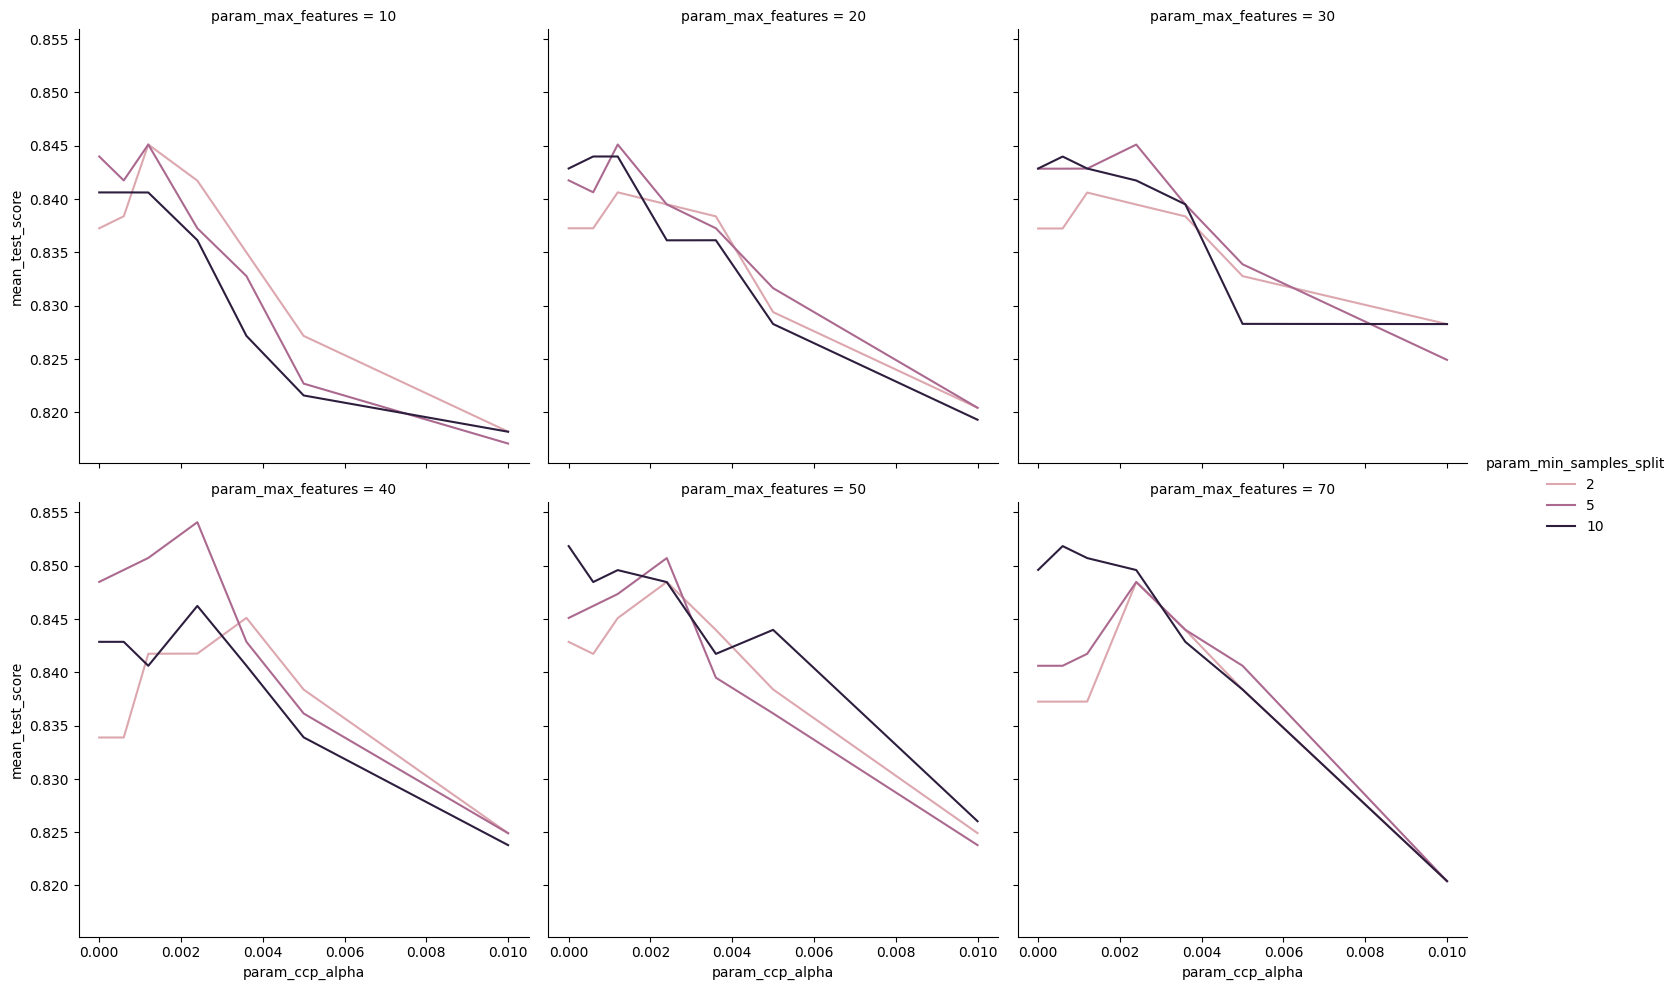

In [112]:
history_rf_short = pd.read_csv(os.path.join(working_dir, 'history_rf.csv'))

sns.relplot(data = history_rf_short,
           x = 'param_ccp_alpha',
           y = 'mean_test_score',
           col = 'param_max_features',
            col_wrap = 3,
           hue = 'param_min_samples_split',
            hue_norm = (0.2,10),
           kind = 'line')

In [113]:
metrics_rf = calc_metrics(grid_search_rf.best_params_, RandomForestClassifier, X_train, y_train)

print_metrics(metrics_rf)

validation accuracy: 0.85
validation precision: 0.85
validation recall: 0.76
validation F1: 0.80


By grid searching the optimal hyperparameter were found and validation accuracy could be very slightly improved compared to a simple decision tree. Actually, it was expected that the "ensemble" methods more significantly increases validation accuracy..

`ccp_alpha` has the highest impact on the validation accuracy. The number of features in each sub-sample has also a significant effect on the model quality. A higher number of 40 features gives the best result.


### <span style = "color: red" > Boosting: AdaBoost

 "AdaBoost" fits a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
 Usually, the classifier is only a decision tree stump, a tree with depth of 1.

 For hyperparameter the following parameter are considered:
 - maximum depth of decision tree, e.g. `DecisionTreeClassifier(max_depth = 1)`
 - number of iterations to fit residuals `n_estimators`
 - weight applied to each classifier at each boosting iteration `learning_rate`

In [114]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 1), n_estimators=100, random_state=129)

ada.fit(X_train, y_train)

train_accuracy = ada.score(X_train, y_train)
val_accuracy = np.mean(cross_val_score(ada, X_train, y_train, cv=5, scoring = 'accuracy'))

print(f'training accuracy: {train_accuracy :.2f}')
print(f'validation accuracy: {val_accuracy :.2f}')

training accuracy: 0.84
validation accuracy: 0.81


In [115]:
param_grid_ada = {'estimator': [ DecisionTreeClassifier(max_depth = 1 ), DecisionTreeClassifier(max_depth = 3 ),
                                DecisionTreeClassifier(max_depth = 5), DecisionTreeClassifier(max_depth = 7)],
                 'n_estimators': [25, 50, 100, 200],
                'learning_rate': [0.01, 0.03, 0.1, 0.3, 1] }

grid_search_ada = optimize(param_grid_ada, AdaBoostClassifier, X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("best hyperparameters: ", grid_search_ada.best_params_)
print("best validation accuracy: ", grid_search_ada.best_score_)

best hyperparameters:  {'estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 0.1, 'n_estimators': 50}
best validation accuracy:  0.8395016006528154


In [116]:
history_ada = grid_search_ada.cv_results_

history_ada_df = pd.DataFrame(history_ada)
history_ada_short = history_ada_df[['param_estimator', 'param_n_estimators', 'param_learning_rate',
                                  'mean_test_score', 'mean_train_score',
                                  'std_test_score', 'std_train_score']]
history_ada_short.to_csv(os.path.join(working_dir, 'history_ada.csv'), index = False)


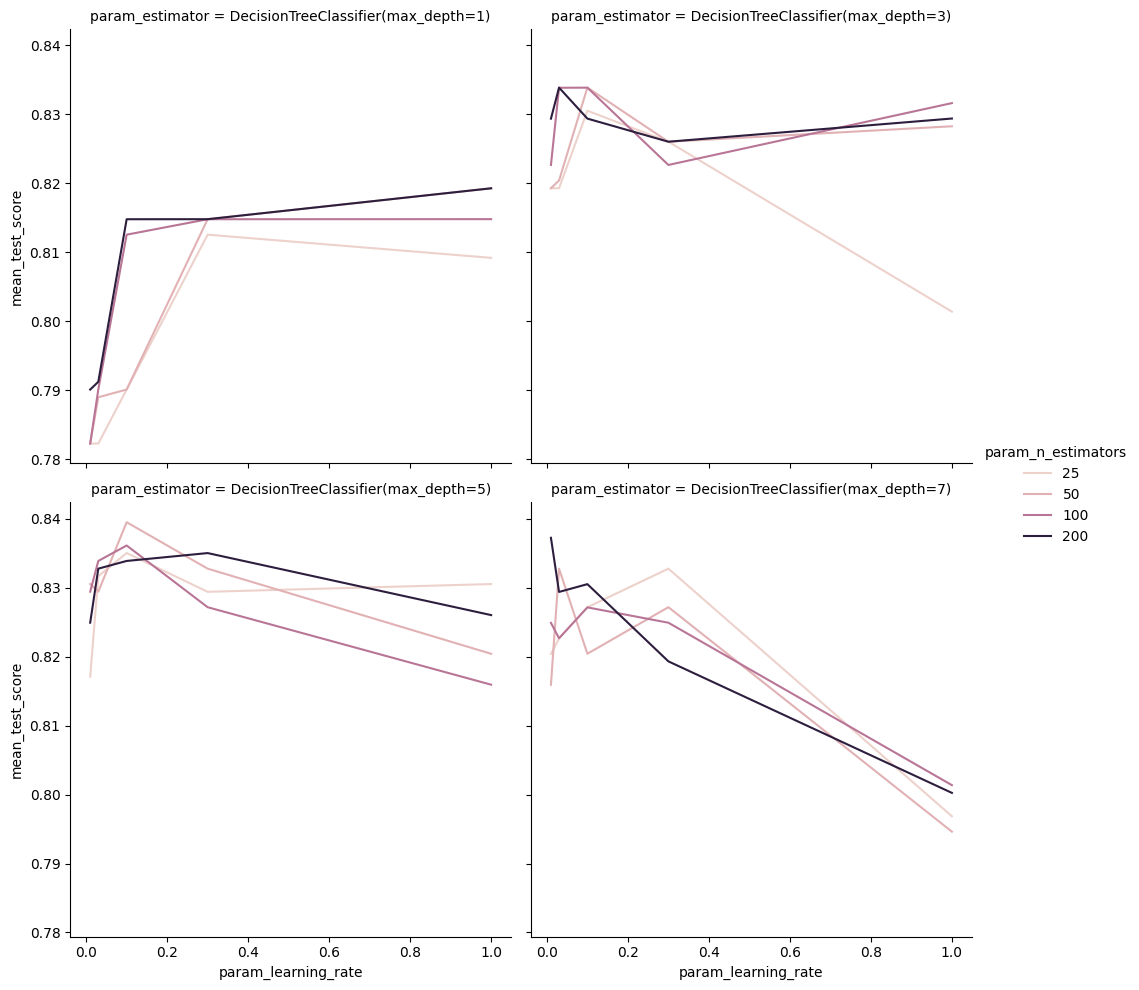

In [117]:
history_ada_short = pd.read_csv(os.path.join(working_dir, 'history_ada.csv'))

sns.relplot(data = history_ada_short,
            x = 'param_learning_rate',
           col = 'param_estimator',
            col_wrap = 2,
           y = 'mean_test_score',
           hue = 'param_n_estimators',
           hue_norm = (25,200),
            kind = 'line')

In [118]:
metrics_ada = calc_metrics(grid_search_ada.best_params_, AdaBoostClassifier, X_train, y_train)

print_metrics(metrics_ada)

validation accuracy: 0.84
validation precision: 0.83
validation recall: 0.73
validation F1: 0.78


Grid dearch revealed that the maximum depth of the decision tree and the learning rate has the highest impact on model performance.
Using only a tree stump, validation accuracy remains even below the one of a "Simple Decision Tree".
Achieved accuracy is similar to the one for "Random Forest".

### <span style = "color: red" > Support Vector Machines

A "Support Vector Machine" SVM calculates a (p-1)-dimensional maximum margin separating hyperplane (when kernel is linear) to separate classes in a p-dimensional vector space. A subset of training points in the decision function (called support vectors) is used, so it is also memory efficient.

The classification algorithm differs significantly from the one of a "Decision Tree". A SVM can only deal with numerical values which should should be all normalized.

Parameters to tune the model are:
- kernel function (polynomial, type of polynom, radial basis function)
- regularization parameter `C`

In [119]:
#https://scikit-learn.org/stable/modules/svm.html

from sklearn.svm import SVC

supv = SVC(C = 5, kernel = 'poly', random_state=129)
supv.fit(X_train_scaled, y_train)

train_accuracy = supv.score(X_train_scaled, y_train)
val_accuracy = np.mean(cross_val_score(supv, X_train_scaled, y_train, cv=5, scoring = 'accuracy'))

print(f'training accuracy: {train_accuracy :.2f}')
print(f'validation accuracy: {val_accuracy :.2f}')

training accuracy: 0.86
validation accuracy: 0.80


In [120]:
param_grid_svm_poly = {'C': [0.1, 1, 2, 5, 10, 25],
              'kernel': ['poly'],
              'degree': [1, 2, 3],
}

grid_search_svm_poly = optimize(param_grid_svm_poly, SVC, X_train_scaled, y_train)

print("best hyperparameters: ", grid_search_svm_poly.best_params_)
print("best validation accuracy: ", grid_search_svm_poly.best_score_)

best hyperparameters:  {'C': 1, 'degree': 1, 'kernel': 'poly'}
best validation accuracy:  0.8350009415604797


In [121]:
history_svm_poly = grid_search_svm_poly.cv_results_

history_svm_poly_df = pd.DataFrame(history_svm_poly)
history_svm_poly_short = history_svm_poly_df[['param_C', 'param_degree', 'mean_test_score', 'mean_train_score',
                                              'std_test_score', 'std_train_score']]
history_svm_poly_short.to_csv(os.path.join(working_dir, 'history_svm_poly.csv'), index = False)

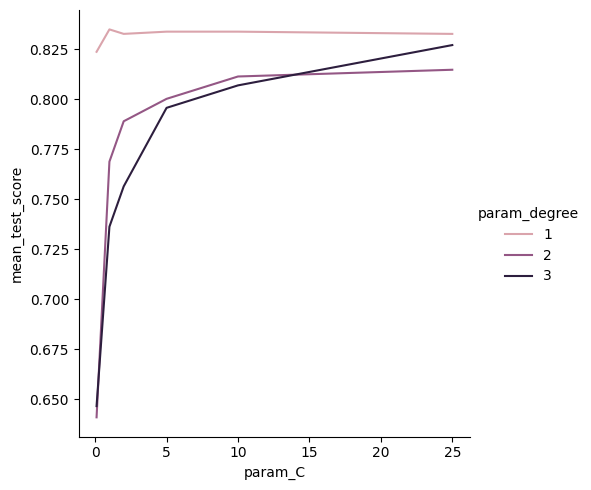

In [122]:
history_svm_poly_short = pd.read_csv(os.path.join(working_dir, 'history_svm_poly.csv'))

sns.relplot(data = history_svm_poly_short,
           x = 'param_C',
           y = 'mean_test_score',
            hue = 'param_degree',
            hue_norm = (0.5,3),
           kind = 'line')

In [123]:
metrics_svm_poly = calc_metrics(grid_search_svm_poly.best_params_, SVC, X_train_scaled, y_train)

print_metrics(metrics_svm_poly)

validation accuracy: 0.84
validation precision: 0.80
validation recall: 0.77
validation F1: 0.78


In [124]:
param_grid_svm_rbf = {'C': [1, 10, 20, 25, 30, 40, 50, 100],
                     'kernel': ['rbf']
                      }

grid_search_svm_rbf = optimize(param_grid_svm_rbf, SVC, X_train_scaled, y_train)


print("best hyperparameters: ", grid_search_svm_rbf.best_params_)
print("best validation accuracy: ", grid_search_svm_rbf.best_score_)

best hyperparameters:  {'C': 10, 'kernel': 'rbf'}
best validation accuracy:  0.8204130311970372


In [125]:
history_svm_rbf = grid_search_svm_rbf.cv_results_

history_svm_rbf_df = pd.DataFrame(history_svm_rbf)
history_svm_rbf_short = history_svm_rbf_df[['param_C', 'mean_test_score', 'mean_train_score', 'std_test_score', 'std_train_score']]
history_svm_rbf_short.to_csv(os.path.join(working_dir, 'history_svm_rbf.csv'), index = False)


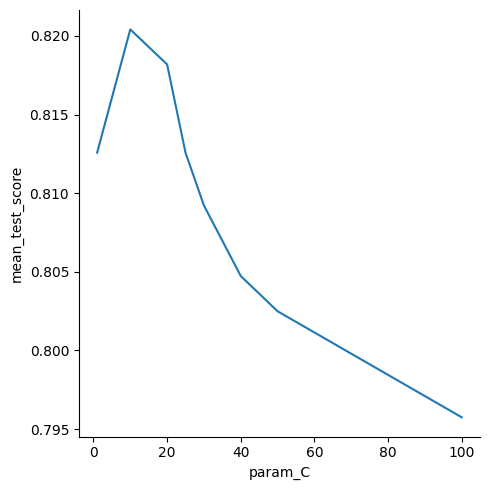

In [126]:
history_svm_rbf_short = pd.read_csv(os.path.join(working_dir, 'history_svm_rbf.csv'))

sns.relplot(data = history_svm_rbf_short,
           x = 'param_C',
           y = 'mean_test_score',
           kind = 'line')

In [127]:
metrics_svm_rbf = calc_metrics(grid_search_svm_rbf.best_params_, SVC, X_train_scaled, y_train)

print_metrics(metrics_svm_rbf)

validation accuracy: 0.82
validation precision: 0.78
validation recall: 0.75
validation F1: 0.76


Best validation accuracy is achieved with a linear kernel (polynomial kernel with degree 1) and C of 1.

Unexpected, validation accuracy is only slightly below the one of the "Decision Tree" methods.

### <span style = "color: red" > Logistic Regression ("Ridge")

As last Machine Learning technique "Logistic Regression" is applied. Due to the high number of features a penalty term for sum of squared regression coeffcients is introduced to avoid overfitting, similar to "Ridge regression" which is used for normal-distributed target values on a continous scale.

In general, the log-odds are modelled according to:

$\ln\frac{p(x_i)}{1-p(x_i)} = \beta_0 + \sum \beta_i x_i$

Like for a "Simple Decision Tree", the model can be easily interpreted by means of the slopes for the different features.



In [128]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(penalty = 'l2', random_state=129)
lm.fit(X_train_scaled, y_train)

train_accuracy = lm.score(X_train_scaled, y_train)
val_accuracy = np.mean(cross_val_score(lm, X_train_scaled, y_train, cv=5, scoring = 'accuracy'))

print(f'training accuracy: {train_accuracy :.2f}')
print(f'validation accuracy: {val_accuracy :.2f}')

training accuracy: 0.86
validation accuracy: 0.82


In [129]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid_lm = {'C': [0.001, 0.01, 0.1, 1, 10],
}

grid_search_lm = optimize(param_grid_lm, LogisticRegression, X_train_scaled, y_train)

print("best hyperparameters: ", grid_search_lm.best_params_)
print("best validation accuracy: ", grid_search_lm.best_score_)

best hyperparameters:  {'C': 0.1}
best validation accuracy:  0.8305379448873266


In [130]:
history_lm = grid_search_lm.cv_results_

history_lm_df = pd.DataFrame(history_lm)
history_lm_short = history_lm_df[['param_C', 'mean_test_score', 'mean_train_score', 'std_test_score', 'std_train_score']]
history_lm_short.to_csv(os.path.join(working_dir, 'history_lm.csv'), index = False)

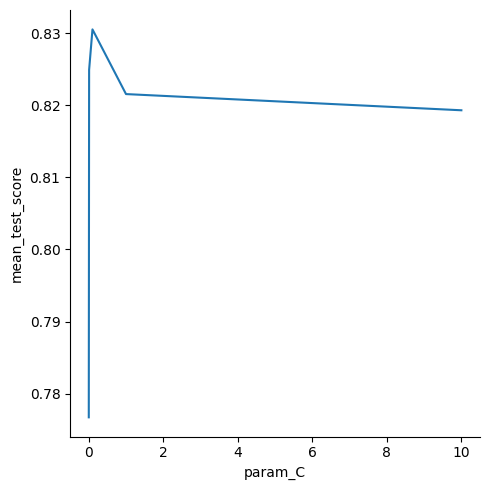

In [131]:
history_lm_short = pd.read_csv(os.path.join(working_dir, 'history_lm.csv'))

sns.relplot(data = history_lm_short,
           x = 'param_C',
           y = 'mean_test_score',
           kind = 'line')

In [132]:
metrics_lm = calc_metrics(grid_search_lm.best_params_, LogisticRegression, X_train_scaled, y_train)

print_metrics(metrics_lm)

validation accuracy: 0.83
validation precision: 0.79
validation recall: 0.77
validation F1: 0.78


In [133]:
best_params_lm = {'C': 0.1}

lm = LogisticRegression(**best_params_lm,
                random_state=129)
lm.fit(X_train_scaled, y_train)
columns_X = train_onehot.columns.tolist()

coefs = {}
for column, coef, in zip(columns_X[1:], lm.coef_[0]):
  coefs[column] = float(coef)

coefs = dict(sorted(coefs.items(), key=lambda item: item[1]))

for key, value in coefs.items():
  print(f'{key}: {value :.2f}')

Sex_male: -0.59
Pclass: -0.55
Title_Mr.: -0.48
Age: -0.35
Ticket New_CA. 2343: -0.27
Ticket New_382652: -0.26
Ticket New_3101295: -0.24
Ticket New_347088: -0.23
Ticket New_347082: -0.22
Ticket New_349909: -0.21
Ticket New_4133: -0.21
Ticket New_W./C. 6608: -0.19
Title_Rev.: -0.18
Embarked_S: -0.15
Ticket New_CA 2144: -0.15
Ticket New_W./C. 6607: -0.14
Ticket New_113781: -0.13
Ticket Str_CA: -0.13
Ticket Passenger: -0.11
FirstNames No: -0.11
Ticket New_PC 17483: -0.10
Ticket New_S.O.C. 14879: -0.10
Ticket Str_PC: -0.09
Ticket Str_A/: -0.08
Cabin Letter_T: -0.07
Ticket Str_SOTON/O.Q.: -0.06
Cabin Letter_G: -0.06
Ticket Str_W./C.: -0.06
SibSp: -0.05
Relatives: -0.04
Ticket New_19950: -0.02
Parch: -0.02
Ticket Str_Rare: -0.02
Embarked_Q: 0.01
Title_Rare: 0.01
Cabin Letter_F: 0.01
Ticket New_PC 17760: 0.02
Ticket New_C.A. 33112: 0.03
Ticket New_PC 17757: 0.03
Ticket No: 0.04
Ticket Str_SC/PARIS: 0.05
Ticket Str_C.A.: 0.05
Cabin Letter_A: 0.05
Ticket Str_SOTON/OQ: 0.05
Cabin Letter_B: 0.06
T

Tuning of `C`lead to a model with similar performance like for the other ML approaches ("Decision Tree", "Support Vector Machine").
Intrestlingly, comparing to the "Simple Decision Tree" also other features played a role like `ShName`, `Cabin Letter` next to  `Pclass`, `Fare Ticket`, `Title`, `Sex`, `Age`, `Ticket New` which were also features relevant in the "Simple Decision Tree".

### <span style = "color: red" > Model Comparison

Different optimized ML models are compared for a single split of the training data into 80% for actual training and 20% for validation.

The "Simple Decision Tree" is here not further assessed, only the advanced techniques built on "Decision Trees" like "Random Forest" and "AdaBoost" are included in the comparison.

Classes and probabilities are predicted for the validation data set for all four ML approaches.

In [134]:
np.random.seed(42)

shuffled_index = np.random.choice(train_onehot.index, replace = False, size = len(train_new))
train_80_indices = shuffled_index[:int(0.8*len(train_onehot))]
train_20_indices = shuffled_index[int(0.8*len(train_onehot)):]


X_train_80 = train_onehot.loc[train_80_indices,train_onehot.columns[1:]].values
y_train_80 = train_onehot.loc[train_80_indices,train_onehot.columns[0]].values

X_train_20 = train_onehot.loc[train_20_indices,train_onehot.columns[1:]].values
y_train_20 = train_onehot.loc[train_20_indices,train_onehot.columns[0]].values

X_train_80.shape, y_train_80.shape, X_train_20.shape, y_train_20.shape

((712, 77), (712,), (179, 77), (179,))

In [135]:
X_train_80_scaled = scaler.transform(X_train_80)
X_train_20_scaled = scaler.transform(X_train_20)
X_train_80_scaled[:1,:]

array([[ 0.84191642,  4.05627087,  2.21880078,  0.6301528 , -0.26824794,
         0.48128777,  0.71076309,  0.70505064, -0.44148567,  0.50495715,
        -0.71385412, -0.4510531 ,  4.52316442, -0.49785048, -1.17105799,
        -0.42090174, -0.11807913, -0.0784163 ,  0.74349692, -0.05536365,
        -0.06785837, -0.05536365, -0.0784163 , -0.06192218, -0.05536365,
        -0.06785837, -0.06192218, -0.05536365, -0.05536365, -0.05536365,
        -0.07332356, -0.07332356, -0.07332356, -0.06785837, -0.06192218,
        -0.05536365, -0.06785837, -0.06192218, -0.05536365, -0.05536365,
        -0.05536365, -0.0784163 , -0.09205746, -0.05536365, -0.05536365,
        -0.07332356, -0.05536365, -0.06192218, -0.05536365,  0.40569785,
        -0.07332356, -0.05536365, -0.05536365, -0.06192218, -0.15574547,
        -0.0784163 , -0.19084344, -0.08773955, -0.09618794, -0.08320503,
        -0.27494677, -0.24478364, -0.09205746, -0.11123994, -0.0784163 ,
        -0.12768848, -0.10397505, -0.13074409, -0.2

In [136]:
def predict_all_models(best_params_rf, best_params_ada, best_params_svm, best_params_lm,
                       X_train, X_train_scaled, y_train,
                       X_test, X_test_scaled, y_test):
  """
  predict_all_models is function to predict classes and probabilities for all models

  :best_params_rf: best hyperparameters for Random Forest
  :best_params_ada: best hyperparameters for AdaBoost
  :best_params_svm: best hyperparameters for Support Vector Machine
  :best_params_lm: best hyperparameters for Logistic Regression
  :X_train: feature matrix for training data
  :X_train_scaled: scaled feature matrix for training data
  :y_train: target vector for training data
  :X_test: feature matrix for validation data
  :X_test_scaled: scaled feature matrix for validation data

  :return: df_results: dataframe with predictions for all models
  """

  df_results = pd.DataFrame(columns = ['y_actual',
                                        'y_rf', 'y_ada', 'y_svm', 'y_lm',
                                        'y_rf_proba', 'y_ada_proba', 'y_svm_proba', 'y_lm_proba'])

  if y_test is not None:
    df_results['y_actual'] = y_test

  #predictions for Random Forest
  rf = RandomForestClassifier(**best_params_rf,
                              random_state=129)
  rf.fit(X_train, y_train)

  df_results['y_rf'] = rf.predict(X_test)
  df_results['y_rf_proba'] = 1 - rf.predict_proba(X_test)

  #predictions for AdaBoost
  ada = AdaBoostClassifier(**best_params_ada,
                           random_state=129)
  ada.fit(X_train, y_train)

  df_results['y_ada'] = ada.predict(X_test)
  df_results['y_ada_proba'] = 1 - ada.predict_proba(X_test)

  #predictions for Support Vector Machine with polynomic kernel
  svm = SVC(**best_params_svm,
                  random_state=129,
                  probability = True)
  svm.fit(X_train_scaled, y_train)

  df_results['y_svm'] = svm.predict(X_test_scaled)
  df_results['y_svm_proba'] = 1 - svm.predict_proba(X_test_scaled)


  #predictions for Logistic Regression
  lm = LogisticRegression(**best_params_lm,
                  random_state=129)
  lm.fit(X_train_scaled, y_train)
  df_results['y_lm'] = lm.predict(X_test_scaled)
  df_results['y_lm_proba'] = 1 - lm.predict_proba(X_test_scaled)

  return df_results

In [137]:
best_params_rf = grid_search_rf.best_params_
best_params_ada = grid_search_ada.best_params_
best_params_svm = grid_search_svm_poly.best_params_
best_params_lm = grid_search_lm.best_params_

df_results_model_comp = predict_all_models(best_params_rf, best_params_ada, best_params_svm, best_params_lm,
                       X_train_80, X_train_80_scaled, y_train_80,
                       X_train_20, X_train_20_scaled, y_train_20)

display(train_new.loc[train_20_indices,:].tail(6))
display(df_results_model_comp.tail(6))

,Survived,Pclass,Title,ShName,BrName,FirstNames No,Sex,Age,SibSp,Parch,Relatives,Ticket New,Ticket No,Ticket Str,Ticket Passenger,Fare Ticket,Cabin Letter,Cabin Passenger,Embarked
PassengerId,,,,,,,,,,,,,,,,,,,
72,0,3,Miss.,0,0,2,female,16.0,5,2,7,CA 2144,2144,CA,8,5.86250,0,0.0,S
107,1,3,Miss.,0,0,2,female,21.0,0,0,0,Rare,343120,0,1,7.65000,0,0.0,S
271,0,1,Mr.,0,0,1,male,29.0,0,0,0,Rare,113798,0,2,15.50000,0,0.0,S
861,0,3,Mr.,0,0,2,male,41.0,2,0,2,Rare,350026,0,2,7.05415,0,0.0,S
436,1,1,Miss.,0,0,2,female,14.0,1,2,3,113760,113760,0,4,30.00000,B,4.0,S
103,0,1,Mr.,0,0,2,male,21.0,0,1,1,Rare,35281,0,2,38.64375,D,2.0,S


,y_actual,y_rf,y_ada,y_svm,y_lm,y_rf_proba,y_ada_proba,y_svm_proba,y_lm_proba
173,0.0,0.0,0.0,0.0,0.0,0.057495,0.130967,0.147500,0.011970
174,1.0,1.0,1.0,1.0,1.0,0.596041,0.553326,0.803793,0.574540
175,0.0,0.0,0.0,0.0,0.0,0.072561,0.227073,0.147718,0.235954
176,0.0,0.0,0.0,0.0,0.0,0.045822,0.155079,0.147409,0.035372
177,1.0,1.0,1.0,1.0,1.0,0.965289,0.874004,0.989796,0.995953
178,0.0,1.0,0.0,0.0,1.0,0.532625,0.423354,0.148182,0.701399


For the individual observations of the validation dataset, it is evaluated if the models predict the same classes or different ones.

In [138]:
df_results_model_comp['all_identical'] = (df_results_model_comp['y_rf'] == df_results_model_comp['y_ada']) &\
                                         (df_results_model_comp['y_svm'] == df_results_model_comp['y_lm'] ) &\
                                         (df_results_model_comp['y_rf'] == df_results_model_comp['y_svm'])


df_results_model_comp['rf_ada_identical'] = df_results_model_comp['y_rf'] == df_results_model_comp['y_ada']
df_results_model_comp['rf_svm_identical'] = df_results_model_comp['y_rf'] == df_results_model_comp['y_svm']
df_results_model_comp['rf_lm_identical'] = df_results_model_comp['y_rf'] == df_results_model_comp['y_lm']
df_results_model_comp['ada_svm_identical'] = df_results_model_comp['y_ada'] == df_results_model_comp['y_svm']
df_results_model_comp['ada_lm_identical'] = df_results_model_comp['y_ada'] == df_results_model_comp['y_lm']
df_results_model_comp['svm_lm_identical'] = df_results_model_comp['y_svm'] == df_results_model_comp['y_lm']

In [139]:
identical = ['rf_ada_identical', 'rf_svm_identical', 'rf_lm_identical',
             'ada_svm_identical', 'ada_lm_identical', 'svm_lm_identical', 'all_identical']

class_comparability = np.round(df_results_model_comp[identical].sum() / len(df_results_model_comp), 2)
class_comparability

,0
rf_ada_identical,0.96
rf_svm_identical,0.90
rf_lm_identical,0.92
ada_svm_identical,0.88
ada_lm_identical,0.89
svm_lm_identical,0.94
all_identical,0.85


The "Decision Tree" based methods like "Random Forest" and "Adaboost" predict for 96% of the observations the same class, independently if predictions are correct or not. Likewise using "Logistic Regression" and "SVM" same class is predicted for 94% of the observations.
Some differences in the class predictions (~10%) are seen between the "Decision Tree" based methods and "Logistic Regression" as well as between the "Decision Tree" based methods and "SVM".

**Other model metrics**

Additionally, accuracy, precision and recall is compared for all four models.

**Accuracy** gives fraction of all correctly predicted observations (TP + TN related to total number of observations).

**Precision** gives fraction of TP related to all positive predicted observations (TP + FP).

**Recall** gives fraction of TP related to all actually positive observations (TP + FN).

In [140]:
df_results_model_comp['all_correct'] = (df_results_model_comp['y_actual'] == df_results_model_comp['y_rf']) & \
                                        (df_results_model_comp['y_actual'] == df_results_model_comp['y_ada']) & \
                                        (df_results_model_comp['y_actual'] == df_results_model_comp['y_svm']) & \
                                        (df_results_model_comp['y_actual'] == df_results_model_comp['y_lm'])


df_results_model_comp['rf_correct'] = (df_results_model_comp['y_actual'] == df_results_model_comp['y_rf'])
df_results_model_comp['ada_correct'] = (df_results_model_comp['y_actual'] == df_results_model_comp['y_ada'])
df_results_model_comp['svm_correct'] = (df_results_model_comp['y_actual'] == df_results_model_comp['y_svm'])
df_results_model_comp['lm_correct'] = (df_results_model_comp['y_actual'] == df_results_model_comp['y_lm'])

In [141]:
accuracy = {}
models = ['rf', 'ada', 'svm', 'lm', 'all']

for model in models:
  correct = model + '_correct'
  accuracy[model] = df_results_model_comp[correct].sum() / len(df_results_model_comp)


print(f'Validation accuracy for all models:')
for key, value in accuracy.items():
  print(f'{key}: {value :.2f}')

Validation accuracy for all models:
rf: 0.85
ada: 0.85
svm: 0.84
lm: 0.83
all: 0.77


In [142]:
df_results_model_comp['rf_TP'] = (df_results_model_comp['y_rf'] == df_results_model_comp['y_actual']) & (df_results_model_comp['y_rf'] == 1)
df_results_model_comp['ada_TP'] = (df_results_model_comp['y_ada'] == df_results_model_comp['y_actual']) & (df_results_model_comp['y_ada'] == 1)
df_results_model_comp['svm_TP'] = (df_results_model_comp['y_svm'] == df_results_model_comp['y_actual']) & (df_results_model_comp['y_svm'] == 1)
df_results_model_comp['lm_TP'] = (df_results_model_comp['y_lm'] == df_results_model_comp['y_actual']) & (df_results_model_comp['y_lm'] == 1)

In [143]:
precision = {}

models = ['rf', 'ada', 'svm', 'lm']

for model in models:
  TP = model + '_TP'
  predicted = 'y_' + model
  precision[model] = df_results_model_comp[TP].sum() / df_results_model_comp[predicted].sum()

print(f'Validation precision for all models:')
for key, value in precision.items():
  print(f'{key}: {value :.2f}')

Validation precision for all models:
rf: 0.80
ada: 0.80
svm: 0.78
lm: 0.76


In [144]:
recall = {}

models = ['rf', 'ada', 'svm', 'lm']

for model in models:
  TP = model + '_TP'
  actual = 'y_actual'
  recall[model] = df_results_model_comp[TP].sum() / df_results_model_comp[actual].sum()

print(f'Validation recall for all models:')
for key, value in recall.items():
  print(f'{key}: {value :.2f}')

Validation recall for all models:
rf: 0.80
ada: 0.78
svm: 0.78
lm: 0.78


Validation accuracy is for all model comparable in range between 83 to 85%. for 77% of all observations, all models predict the same correct result.

Also, precision and recall are highly similar between all models ranging between 76 to 80%. Precision and recall are lower than accuracy as models were optimized with regard to accuracy, and there is a class imbalance between "Survived" and "Not survived".

Best model is "Random Forest", but the other models perform nearly the same.

**All four models in ensemble**

Idea is to improve the predictions by using all four models in ensemble. Results of "Random Forest" were considered with a doubled weight in the ensemble predictions as this is the best modlling technique.

In [155]:
df_results_model_comp['y_averaged_proba'] = (2*df_results_model_comp['y_rf_proba']  + \
                                             df_results_model_comp['y_ada_proba'] + \
                                          df_results_model_comp['y_svm_proba'] + \
                                          df_results_model_comp['y_lm_proba']) / 5

df_results_model_comp['y_averaged'] = (df_results_model_comp['y_averaged_proba'] > 0.5).astype('int')

df_results_model_comp['y_averaged_correct'] = (df_results_model_comp['y_actual'] == df_results_model_comp['y_averaged'])
accuracy_ensemble = df_results_model_comp['y_averaged_correct'].sum() / len(df_results_model_comp)

print(f'Ensemble validation accuracy for all models: {accuracy_ensemble :.2f}')

df_results_model_comp.iloc[:,[x for x in range(9)] + [df_results_model_comp.shape[1] - 1]].tail(6)

Ensemble validation accuracy for all models: 0.84


,y_actual,y_rf,y_ada,y_svm,y_lm,y_rf_proba,y_ada_proba,y_svm_proba,y_lm_proba,y_averaged_correct
173,0.0,0.0,0.0,0.0,0.0,0.057495,0.130967,0.147500,0.011970,True
174,1.0,1.0,1.0,1.0,1.0,0.596041,0.553326,0.803793,0.574540,True
175,0.0,0.0,0.0,0.0,0.0,0.072561,0.227073,0.147718,0.235954,True
176,0.0,0.0,0.0,0.0,0.0,0.045822,0.155079,0.147409,0.035372,True
177,1.0,1.0,1.0,1.0,1.0,0.965289,0.874004,0.989796,0.995953,True
178,0.0,1.0,0.0,0.0,1.0,0.532625,0.423354,0.148182,0.701399,True


Combing all models to an ensemble did not improve validation accuracy.

Somehow, this result is logic as the behavior of the passengers during the sinking of the "Titanic" followed some rules, but these rules did not apply to all passenger during this disaster. Some passenger might have been sick, slept or whatever, not every behavior can be derived from passenger class, age, sex and the other given features. A 100% accuracy is impossible to achieve for this dataset.

In [146]:
df_results_model_comp.to_csv(os.path.join(working_dir, 'df_results_model_comp.csv'), index = False)

## <span style = "color: red" > Summary and Conclusion
I have chosen the "Titanic" dataset from a *Kaggle* competition.
Goal is to predict if a passenger survived the sinking of the "Titanic" or not. This is a classification task. Several features characterizing the passenger like ticket class, sex and age, but also trip specific information like cabin number and fare are given.

A high number of features were enigineered, specifically out othe passenger name, ticket number and cabin number.
The data set contained several missing values. These were imputed using the information of other passengers. No outliers are in the data set.

Exploratory data analysis revealed that all features are associated with differences in the class distribution of the target variable, passenger survived the sinking of the ocean liner or not.

Five different ML techniques were used to solve the classification task.
- Simple Decision Tree
- Random Forest
- AdaBoost based on Decision Tree
- Support Vector Machine
- Logistic Regression with Regularization

It was expected that the "Decision Tree" based methods provide the best model fit.

Model optimization activities and hyperparameter tuning are summarized in the following table.

| Model | Hyperparameter | Investigated range|Setting | Impact |Validation accuracy 5x|
|-|-|-|-|-|-|
|Simple Decision Tree| ccp_alpha |0 - 0.033|0.0026 | +++|0.84|
|Random Forest| ccp_alpha | 0 - 0.01| 0.0024|+++|0.85|
||max_features|10 - 70| 40 | + | |
||min_samples_split| 2-10 | 5| + ||
|AdaBoost| max_depth for DecisionTreeClassifier|1 - 7|5|++|0.84|
||learning_rate|0.01 - 1|0.1|+++||
||n_estimators|25 - 200|50|+||
|Support Vector Machine|kernel|polynomic with degree 1, 2, 3 and rbf|polynomic with degree 1 (linear)|+|0.84|
||C|0.1 - 100|1|+++||
|Logistic Regression with Regularization|C|0.001 - 10|0.1|+++|0.83

All ML techniques performed very similar and gave similar accuracy, precision and recall in the cross-validation and for the validation data of one specific data split.

Using these methods in ensemble did not improve the validation accuracy which is logic as on board of the "Titanic" the loading of the life boats and the behavior of the passenger followed some rules, but not every single action of a passenger can be derived from the given features like passenger class, age, sex and the cabin and ticket numbers.


## <span style = "color: red" > Predictions for *Kaggle* Test Data Set

Predictions for *Kaggle* test dataset are made using "Random Forest" and the ensemble of all four methods (except for "Simple Decision Tree").

In [147]:
sample_subm = pd.read_csv(os.path.join(titanic_path, 'gender_submission.csv'), index_col=0)
sample_subm.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [148]:
df_results_test = predict_all_models(best_params_rf, best_params_ada, best_params_svm, best_params_lm,
                       X_train, X_train_scaled, y_train,
                       X_test, X_test_scaled, y_test = None)

In [149]:
df_results_test['y_averaged_proba'] = (2*df_results_test['y_rf_proba']  + \
                                         df_results_test['y_ada_proba'] + \
                                          df_results_test['y_svm_proba'] + \
                                          df_results_test['y_lm_proba']) / 5

df_results_test['y_averaged'] = (df_results_test['y_averaged_proba'] > 0.5).astype('int')

In [150]:
df_results_test.head(5)

,y_actual,y_rf,y_ada,y_svm,y_lm,y_rf_proba,y_ada_proba,y_svm_proba,y_lm_proba,y_averaged_proba,y_averaged
0,NaN,0.0,0.0,0.0,0.0,0.061862,0.171751,0.142358,0.082312,0.104029,0
1,NaN,0.0,0.0,1.0,1.0,0.329293,0.470326,0.795848,0.586114,0.502175,1
2,NaN,0.0,0.0,0.0,0.0,0.084003,0.181918,0.142350,0.067540,0.111963,0
3,NaN,0.0,0.0,0.0,0.0,0.106341,0.187087,0.142343,0.072049,0.122832,0
4,NaN,1.0,1.0,1.0,1.0,0.738392,0.591987,0.795966,0.746246,0.722197,1


In [151]:
#Sample submission for Random Forest
df_rf = df_results_test[['y_rf']].astype(int)
df_rf.index = np.arange(892, 892 + len(df_rf))
df_rf.index.name = 'PassengerId'
df_rf.columns = ['Survived']
df_rf.to_csv(os.path.join(working_dir, 'results_test_rf.csv'))
df_rf.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [152]:
#Sample submission for ensemble of all for methods
df_all = df_results_test[['y_averaged']]
df_all.index = np.arange(892, 892 + len(df_all))
df_all.index.name = 'PassengerId'
df_all.columns = ['Survived']
df_all.to_csv(os.path.join(working_dir, 'results_test_all.csv'))
df_all.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


Best *Kaggle* accuracy: 0.78229 (top 18%) 😀

## <span style = "color: red" > Literature

- James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning.
- https://www.kaggle.com/competitions/titanic
- https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html